In [29]:
#Importing the necessary libraries necessary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import levene
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [30]:
#Loading the dataset
df = pd.read_excel("AIDA_Dataset.xlsx")
df1 = df.copy()
#We also create a copy of our original data as our original data will be normalized
df.describe()

CustomerID           Age         Income  SpendingScore  \
count  10000.00000  10000.000000   10000.000000   10000.000000   
mean    5000.50000     43.539400   84663.394600      53.597500   
std     2886.89568     14.911636   37671.632977      21.831517   
min        1.00000     18.000000   20018.000000       1.000000   
25%     2500.75000     31.000000   51280.000000      37.000000   
50%     5000.50000     43.000000   84912.500000      54.000000   
75%     7500.25000     56.000000  117105.250000      71.000000   
max    10000.00000     69.000000  149985.000000     100.000000   

       OnlineShoppingFrequency  CustomerSatisfaction  PromotionalEmailsOpened  \
count              10000.00000          10000.000000             10000.000000   
mean                  10.59510              5.528600                24.592700   
std                    5.71029              2.859965                14.344267   
min                    1.00000              1.000000                 0.000000   
25%                    6.00000              3.000000                12.000000   
50%                   11.00000              6.000000                25.000000   
75%                   16.00000              8.000000                37.000000   
max                   20.00000             10.000000                49.000000   

       ProductReturns  ConversionRate  
count    10000.000000    10000.000000  
mean         4.525600        0.155330  
std          2.889529        0.082952  
min          0.000000        0.010044  
25%          2.000000        0.083855  
50%          5.000000        0.155009  
75%          7.000000        0.228022  
max          9.000000        0.299964

In [31]:
#printing the first five rows
df.head()

CustomerID  Age  Gender  Income  SpendingScore  OnlineShoppingFrequency  \
0           1   56    Male  129952             34                        5   
1           2   69  Female   74235             91                       19   
2           3   46  Female   78565             67                       15   
3           4   32  Female   75342             26                        1   
4           5   60    Male   62723             35                        5   

  PreferredChannel  CustomerSatisfaction  PromotionalEmailsOpened  \
0           Online                     9                       40   
1         In-Store                     4                       11   
2         In-Store                     9                       19   
3             Both                     1                       33   
4             Both                     5                       35   

   ProductReturns LoyaltyProgram  ConversionRate  
0               5             No        0.045971  
1               1             No        0.037305  
2               4            Yes        0.167028  
3               0             No        0.218419  
4               7             No        0.192754

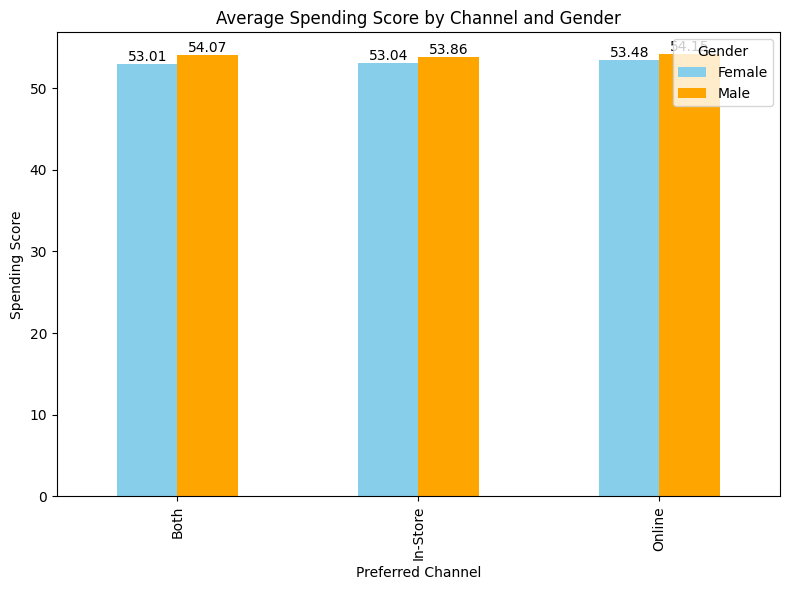

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("AIDA_Dataset.xlsx")

# Grouping the data
grouped = df.groupby(['PreferredChannel', 'Gender'])['SpendingScore'].mean().unstack()


# Creating the bar plot
ax = grouped.plot(kind='bar', figsize=(8, 6), title='Average Spending Score by Channel and Gender', color=['skyblue', 'orange'])


# Adding labels and title
plt.xlabel('Preferred Channel')
plt.ylabel('Spending Score')


# Adding numbers on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, color='black')


plt.tight_layout()
plt.show()


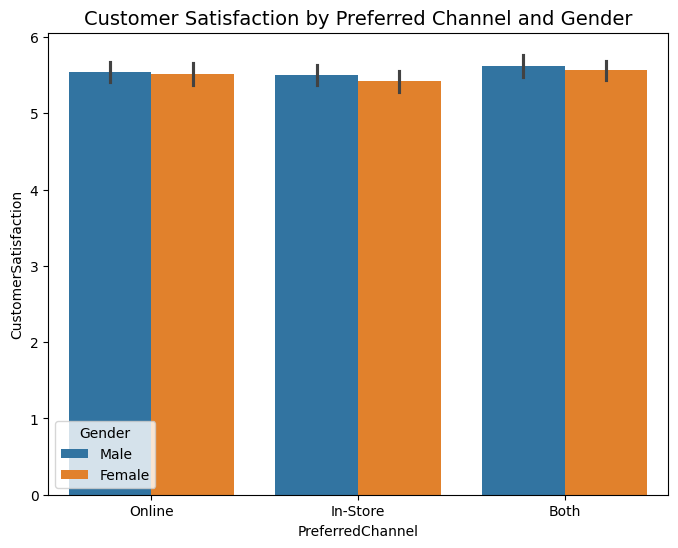

In [33]:
#Bar Plots


    #Compare averages of numerical variables for each category (e.g., PreferredChannel vs. CustomerSatisfaction).


plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='PreferredChannel', y='CustomerSatisfaction', hue='Gender')
plt.title('Customer Satisfaction by Preferred Channel and Gender', fontsize=14)
plt.show()

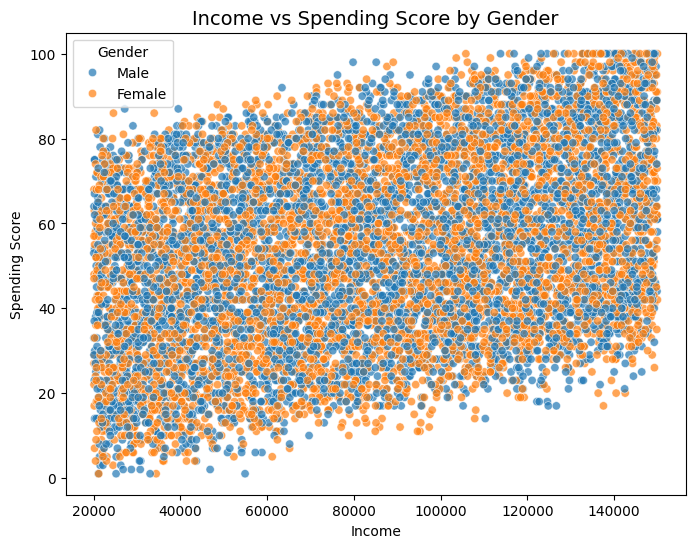

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income', y='SpendingScore', hue='Gender', alpha=0.7)
plt.title('Income vs Spending Score by Gender', fontsize=14)
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

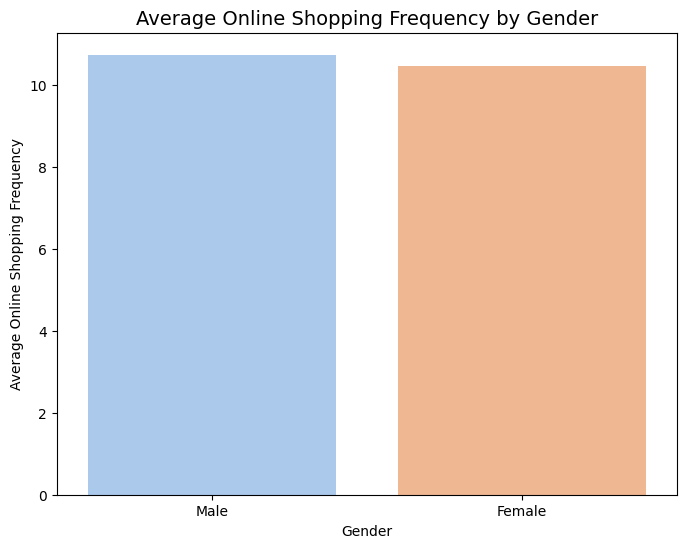

In [35]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Gender', y='OnlineShoppingFrequency', ci=None, palette='pastel')
plt.title('Average Online Shopping Frequency by Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Average Online Shopping Frequency')
plt.show()




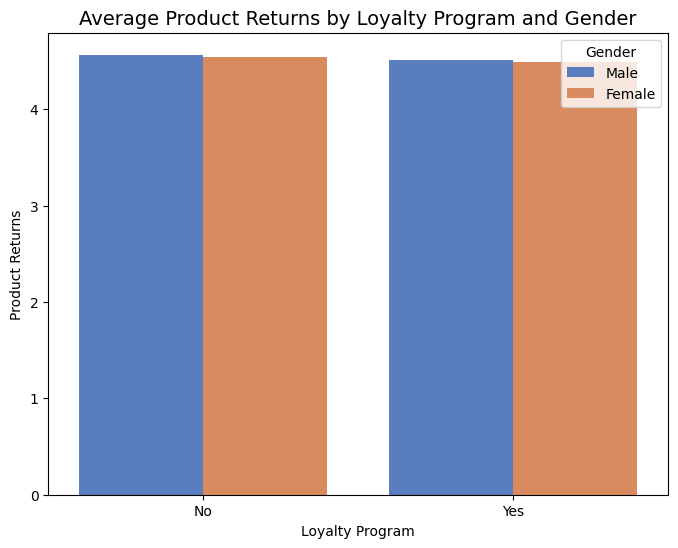

In [36]:
# Average Product Returns by Loyalty Program
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='LoyaltyProgram', y='ProductReturns', hue='Gender', ci=None, palette='muted')
plt.title('Average Product Returns by Loyalty Program and Gender', fontsize=14)
plt.xlabel('Loyalty Program')
plt.ylabel('Product Returns')
plt.show()


#DATA PREPROCESSING

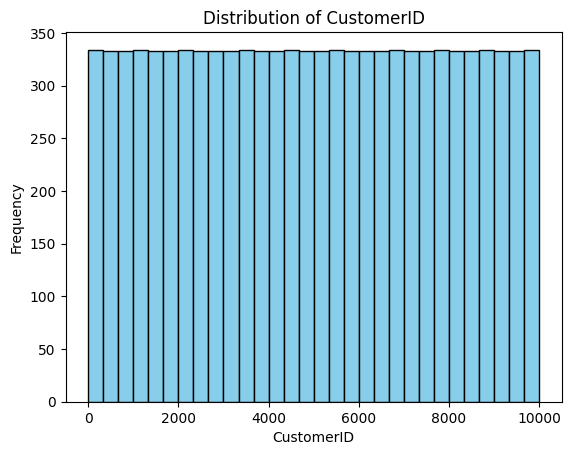

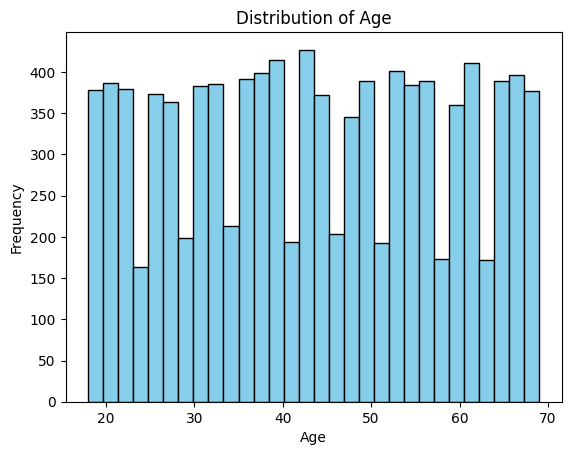

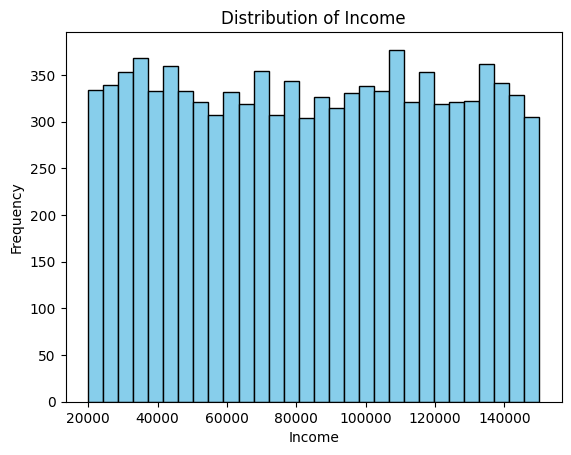

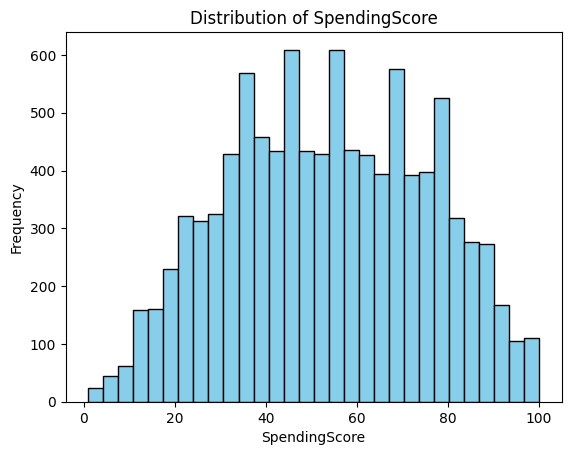

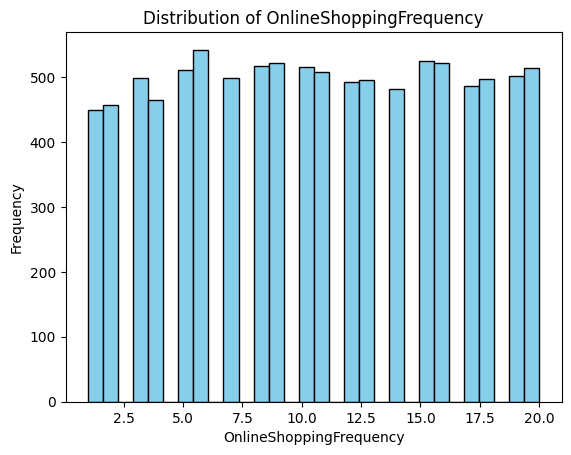

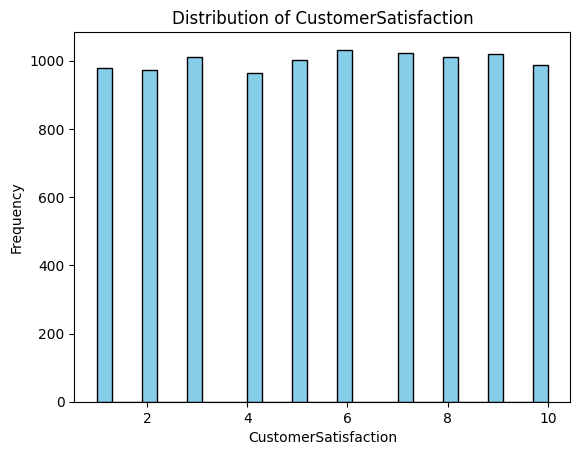

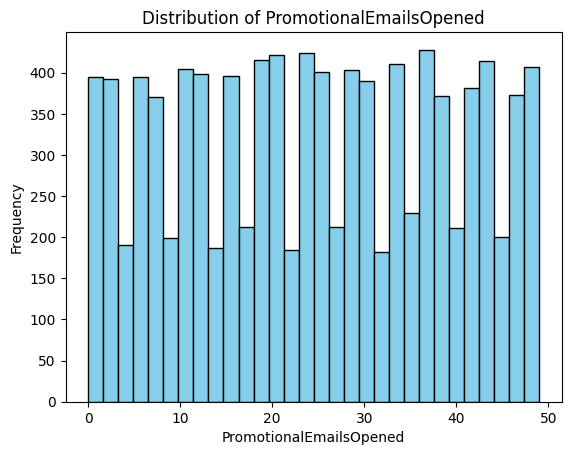

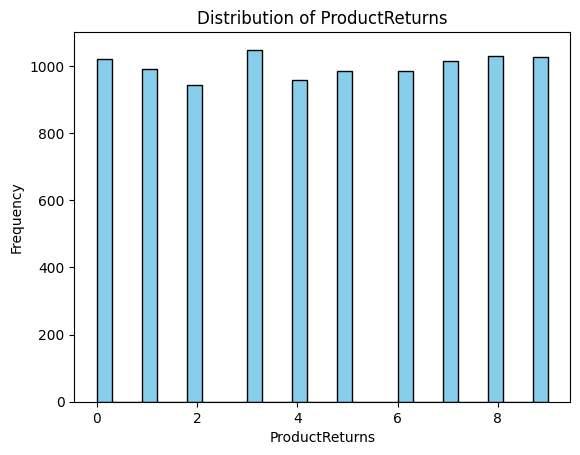

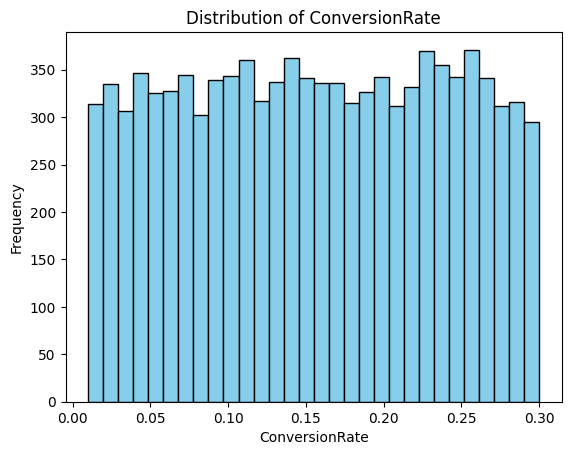

In [37]:
for column in df.select_dtypes(include=["int64", "float64"]).columns:
    df[column].plot(kind="hist", bins=30, title=f"Distribution of {column}", color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


We can see that most of the datas are  not skewed

##DATA Cleaning

In [38]:
#We see the columsn with numerical features and categorical features
df.dtypes

CustomerID                   int64
Age                          int64
Gender                      object
Income                       int64
SpendingScore                int64
OnlineShoppingFrequency      int64
PreferredChannel            object
CustomerSatisfaction         int64
PromotionalEmailsOpened      int64
ProductReturns               int64
LoyaltyProgram              object
ConversionRate             float64
dtype: object

Checking for null values

In [39]:
#We check to see if there are any null values
df.isnull().any()

CustomerID                 False
Age                        False
Gender                     False
Income                     False
SpendingScore              False
OnlineShoppingFrequency    False
PreferredChannel           False
CustomerSatisfaction       False
PromotionalEmailsOpened    False
ProductReturns             False
LoyaltyProgram             False
ConversionRate             False
dtype: bool

There are no null values which means that, we do not need to remove or fill in the NA values in any rows or columns

In [40]:
#Checking for duplicate rows
df.duplicated().any()

False

We then check for any duplicate rows which return False showing that there are no Null values in any rows

Checking for outliers

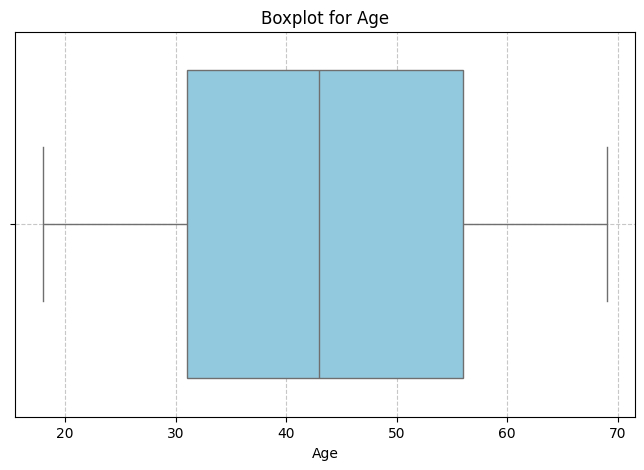

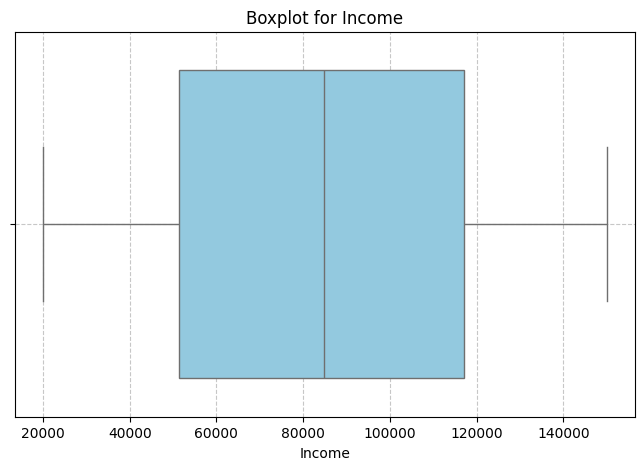

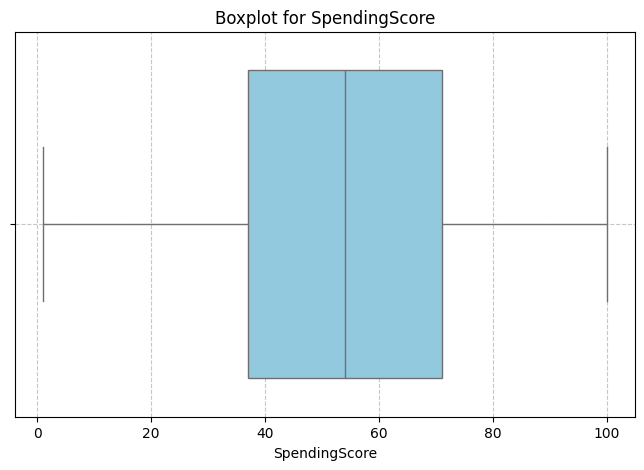

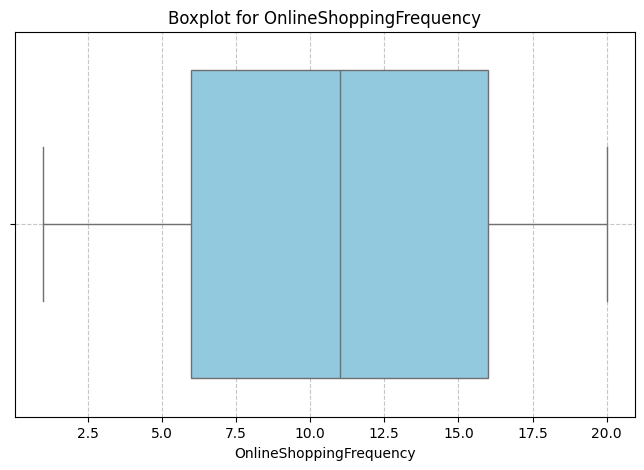

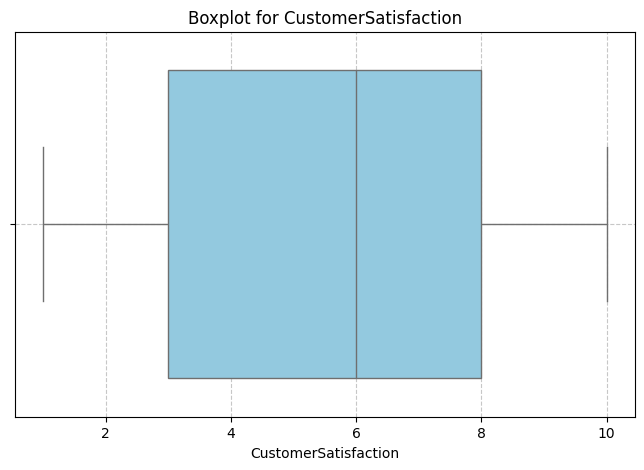

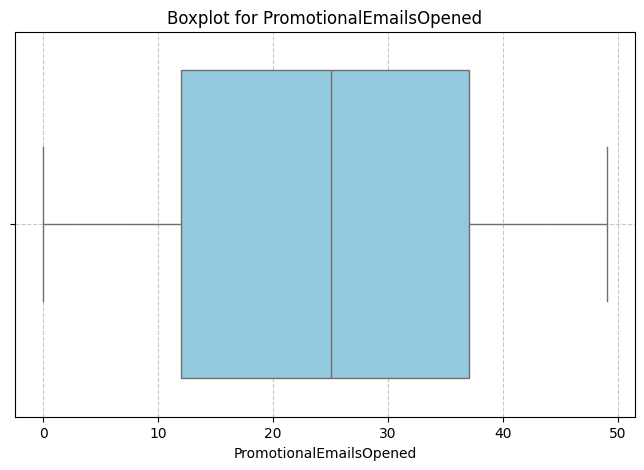

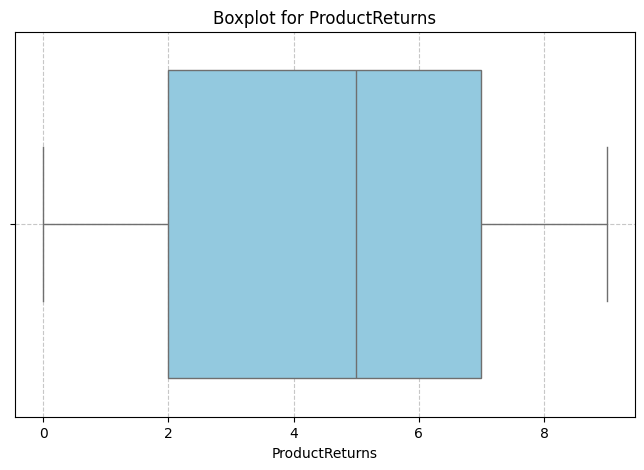

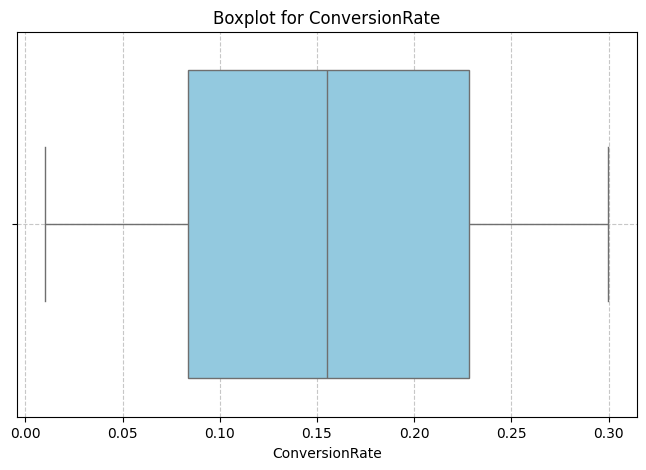

In [41]:
#we select only the numeric columns to check for outliers
numeric_columns = df.select_dtypes(include=["int64", "float64"]).drop(columns = ["CustomerID"]).columns

# Loop through numeric columns to create boxplots
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

The boxplot in each shows that there are no outliers in our data

Using interquatile range to Check for outliers and removing them

In [42]:
#looping over the numeric columns again
for col in numeric_columns:
  #taking the 25th percentile
  Q1 = df[col].quantile(0.25)
  #taking the 75th percentile
  Q3 = df[col].quantile(0.75)
  #defining the IQR
  IQR = Q3-Q1
  #Defining the lower bound
  lowerBound = Q1 - 1.5*IQR
  #Defining the upper bound
  upperBound = Q3 + 1.5*IQR
  #Now then remove the outliers by taking values between lower bound AND upper bound
  df = df[(df[col] >= lowerBound) & (df[col] <= upperBound)]

df

CustomerID  Age  Gender  Income  SpendingScore  OnlineShoppingFrequency  \
0              1   56    Male  129952             34                        5   
1              2   69  Female   74235             91                       19   
2              3   46  Female   78565             67                       15   
3              4   32  Female   75342             26                        1   
4              5   60    Male   62723             35                        5   
...          ...  ...     ...     ...            ...                      ...   
9995        9996   55    Male   86561             43                        8   
9996        9997   51  Female   50869             32                        7   
9997        9998   57  Female   85094             33                        3   
9998        9999   64    Male  120355             87                       19   
9999       10000   32  Female   50192             78                       19   

     PreferredChannel  CustomerSatisfaction  PromotionalEmailsOpened  \
0              Online                     9                       40   
1            In-Store                     4                       11   
2            In-Store                     9                       19   
3                Both                     1                       33   
4                Both                     5                       35   
...               ...                   ...                      ...   
9995             Both                     2                        4   
9996             Both                     7                       49   
9997             Both                     3                       21   
9998         In-Store                     8                        4   
9999             Both                     4                       36   

      ProductReturns LoyaltyProgram  ConversionRate  
0                  5             No        0.045971  
1                  1             No        0.037305  
2                  4            Yes        0.167028  
3                  0             No        0.218419  
4                  7             No        0.192754  
...              ...            ...             ...  
9995               1            Yes        0.263785  
9996               0            Yes        0.087479  
9997               1            Yes        0.173484  
9998               1            Yes        0.236795  
9999               0            Yes        0.109783  

[10000 rows x 12 columns]

Checking whethere the target variable is unbalanced or balanced

In [43]:
df["LoyaltyProgram"].value_counts().reset_index()

LoyaltyProgram  count
0             No   5038
1            Yes   4962

In classification problem, having an unbalanced dataset can lead to overfitting and problems in score metrics. But in our dataset, the values of "No" and "Yes" is balanced depicting a good data

##Data Visualization

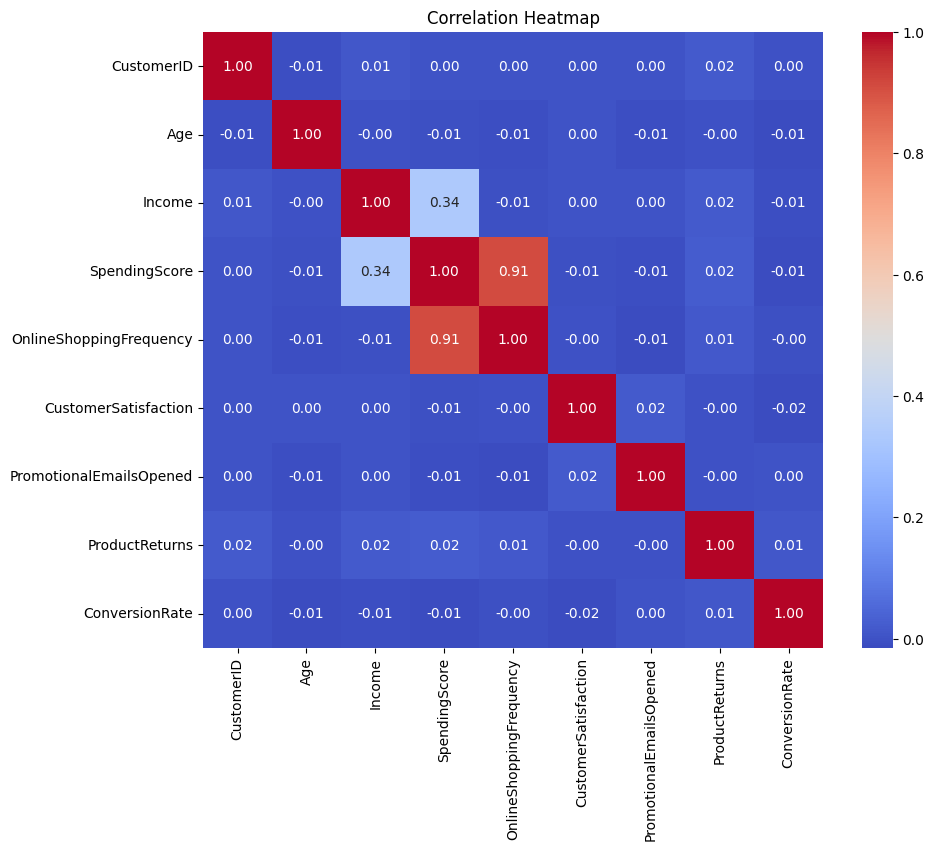

In [44]:
corr_matrix = df.select_dtypes(include = ["int64", "float64"]).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

The above correlation matrix shows that there is less correlation between the columns(or features) suggesting that there are no confounders among the independent variables and the dependent variables

##FEATURE ENGINEERING

In [45]:
#Importing necessary libraries for sacling

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
scaler = MinMaxScaler()

#We apply label encoding to columns with two distinct categories, such as Gender and LoyaltyProgram
df["Gender"] = labelencoder.fit_transform(df["Gender"])
df["LoyaltyProgram"]= labelencoder.fit_transform(df["LoyaltyProgram"])

#We apply OneHotEncoder to columns with more than three distinct categories.
ct = ColumnTransformer([("Channel", OneHotEncoder(), [6])], remainder = "passthrough")
df = ct.fit_transform(df)

In [46]:
columns = ["Both", "In-Store", "Online"]
columns += ["CustomerID","Age", "Gender","Income","SpendingScore","OnlineShoppingFrequency", "CustomerSatisfaction",	"PromotionalEmailsOpened", "ProductReturns", "LoyaltyProgram", "ConversionRate"]

In [47]:
#Transforming back to DataFrame
df = pd.DataFrame(df, columns = columns)



In [48]:
df.head()

Both  In-Store  Online  CustomerID   Age  Gender    Income  SpendingScore  \
0   0.0       0.0     1.0         1.0  56.0     1.0  129952.0           34.0   
1   0.0       1.0     0.0         2.0  69.0     0.0   74235.0           91.0   
2   0.0       1.0     0.0         3.0  46.0     0.0   78565.0           67.0   
3   1.0       0.0     0.0         4.0  32.0     0.0   75342.0           26.0   
4   1.0       0.0     0.0         5.0  60.0     1.0   62723.0           35.0   

   OnlineShoppingFrequency  CustomerSatisfaction  PromotionalEmailsOpened  \
0                      5.0                   9.0                     40.0   
1                     19.0                   4.0                     11.0   
2                     15.0                   9.0                     19.0   
3                      1.0                   1.0                     33.0   
4                      5.0                   5.0                     35.0   

   ProductReturns  LoyaltyProgram  ConversionRate  
0             5.0             0.0        0.045971  
1             1.0             0.0        0.037305  
2             4.0             1.0        0.167028  
3             0.0             0.0        0.218419  
4             7.0             0.0        0.192754

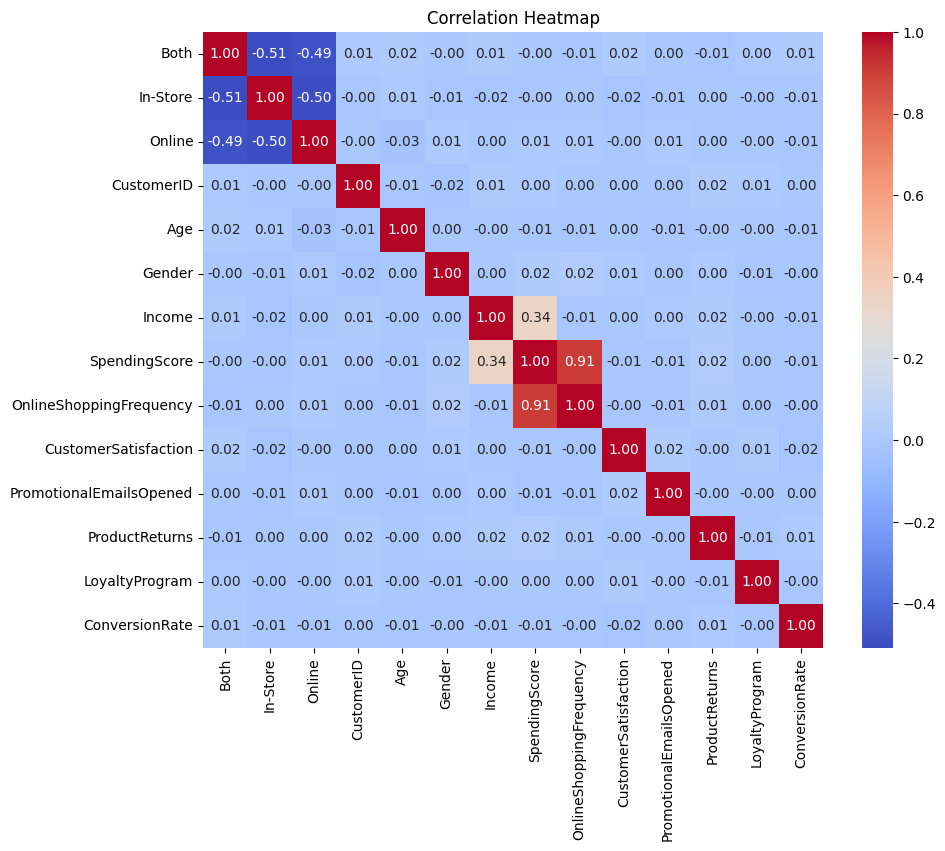

In [49]:
#Again applying heatmap to our scaled data
corr_matrix = df.select_dtypes(include = ["int64", "float64"]).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

##KMeans Clustering

In [50]:
#First defining our features necessary
df2 = df.copy()
df = df.drop("Both", axis = 1)
features = df2[["SpendingScore", "Income", "OnlineShoppingFrequency"]]

features = scaler.fit_transform(features)
#We create Kmeans Clustering
from sklearn.cluster import KMeans

inertia = []
#Taking different ranges of k values to get the best number of clusters
K = range(2,10)

#looping through 2 till 9
for k in K:
  kmeans = KMeans(n_clusters = k, random_state = 42)
  kmeans.fit(features)
  inertia.append(kmeans.inertia_)

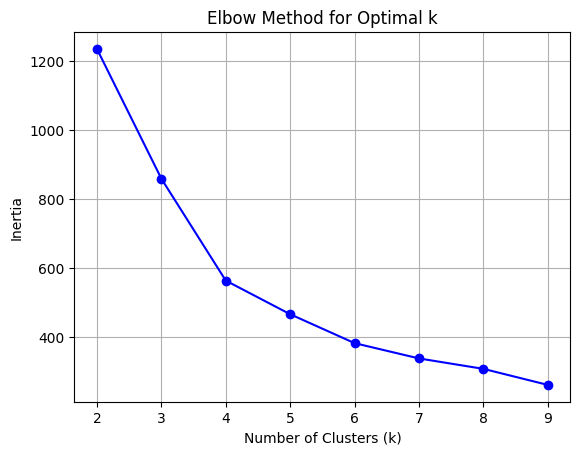

In [51]:
plt.plot(K, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()

From the above graph, we can see that line plot bends at 4, so we will use 4 as the best k value

In [52]:
#Now performing Kmeans using k = 4, we have
kmeans = KMeans(n_clusters = 4, random_state = 42)
df2["Cluster"] = kmeans.fit_predict(features)
centroid = kmeans.cluster_centers_
model_inertia = kmeans.inertia_

df2[["CustomerID", "Cluster"]]



CustomerID  Cluster
0            1.0        3
1            2.0        0
2            3.0        1
3            4.0        2
4            5.0        2
...          ...      ...
9995      9996.0        3
9996      9997.0        2
9997      9998.0        2
9998      9999.0        0
9999     10000.0        1

[10000 rows x 2 columns]

we visiluazie the Kmeans with x = "SpendingScore" and y = "Income" and putting

<Axes: xlabel='SpendingScore', ylabel='Income'>

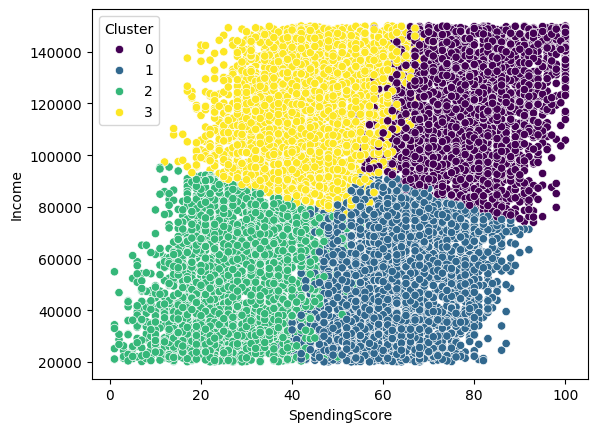

In [53]:
sns.scatterplot(data = df2, x = "SpendingScore", y= "Income", hue = "Cluster", palette = "viridis")

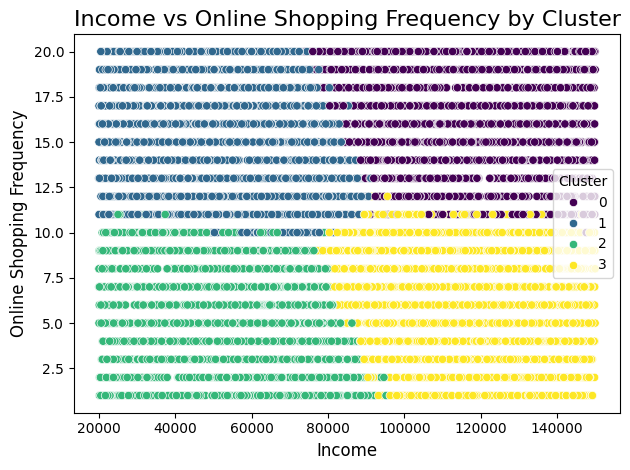

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a scatter plot with Income and OnlineShoppingFrequency
sns.scatterplot(data=df2,
                x='Income',
                y='OnlineShoppingFrequency',
                hue='Cluster',  # Color by cluster
                palette='viridis')  # Color palette

#Plot
plt.title('Income vs Online Shopping Frequency by Cluster', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Online Shopping Frequency', fontsize=12)
plt.tight_layout()
plt.show()


#This representation of the clusters using Inocome and Shopping frequency also gives a somewhat clear customer segmentation, and can be used to study different customer groups with these two features alone

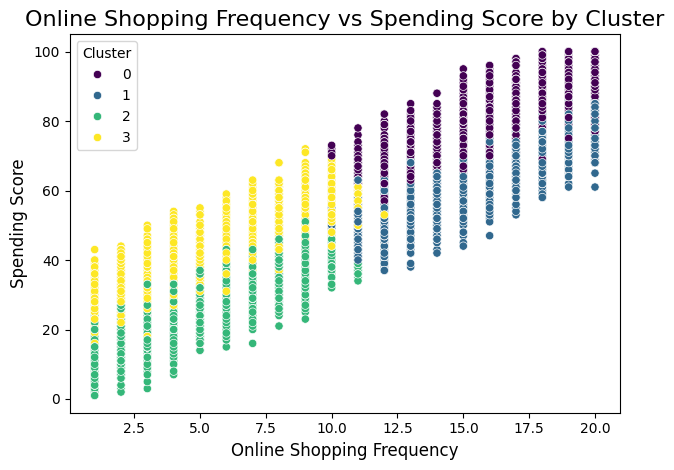

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt


# Creating the scatter plot with OnlineShoppingFrequency and SpendingScore
sns.scatterplot(data=df2,
                x='OnlineShoppingFrequency',
                y='SpendingScore',
                hue='Cluster',  # Color by cluster
                palette='viridis')  # Color palette

# Plot
plt.title('Online Shopping Frequency vs Spending Score by Cluster', fontsize=16)
plt.xlabel('Online Shopping Frequency', fontsize=12)
plt.ylabel('Spending Score', fontsize=12)
plt.tight_layout()
plt.show()



In [56]:
import plotly.express as px
import pandas as pd

#Creating the scatter plot with Plotly
fig = px.scatter_3d(df2,
                    x='SpendingScore',
                    y='Income',
                    z='OnlineShoppingFrequency',  # Adding the third dimension
                    color='Cluster',  # Cluster colors
                    color_continuous_scale='viridis',  # Use a continuous color scale
                    title='3D Scatter Plot of Clusters',
                    labels={'SpendingScore': 'Spending Score', 'Income': 'Income', 'OnlineShoppingFrequency': 'Online Shopping Frequency'}
                   )

#Plot
fig.show()


In [57]:
# Calculate mean for numeric columns
numeric_columns = ["Age", "Income", "SpendingScore", "OnlineShoppingFrequency",
                   "CustomerSatisfaction", "PromotionalEmailsOpened",
                   "ProductReturns", "ConversionRate"]

cluster_means = df2.groupby("Cluster")[numeric_columns].mean().reset_index()

#most frequency for non-numeric
channel_means = df2.groupby("Cluster")[["Both","In-Store", "Online"]].mean()
channel_modes = channel_means.idxmax(axis=1).reset_index(name="PreferredChannel")

#most frequency for non-numeric
non_numeric_analysis = df2.groupby("Cluster")[["Gender", "LoyaltyProgram"]].agg(lambda x: x.mode()[0]).reset_index()

# Combine analyses
combined_analysis = pd.merge(cluster_means, channel_modes, on="Cluster")
combined_analysis = pd.merge(combined_analysis, non_numeric_analysis, on="Cluster")

# Map encoded values back to categories
gender_mapping = {1: "Male", 0: "Female"}
loyalty_mapping = {0: "No", 1: "Yes"}

combined_analysis["Gender"] = combined_analysis["Gender"].map(gender_mapping)
combined_analysis["LoyaltyProgram"] = combined_analysis["LoyaltyProgram"].map(loyalty_mapping)

combined_analysis


Cluster        Age         Income  SpendingScore  OnlineShoppingFrequency  \
0        0  43.353807  117485.172486      79.278502                16.004207   
1        1  43.478959   52506.434966      63.049732                15.079572   
2        2  43.416807   51518.632179      28.067568                 5.288851   
3        3  43.876183  116669.348353      44.018932                 6.045816   

   CustomerSatisfaction  PromotionalEmailsOpened  ProductReturns  \
0              5.491796                24.469499        4.587295   
1              5.545907                24.263963        4.545524   
2              5.539274                24.689611        4.404983   
3              5.535025                24.942067        4.558501   

   ConversionRate PreferredChannel  Gender LoyaltyProgram  
0        0.152780         In-Store    Male             No  
1        0.155913         In-Store  Female            Yes  
2        0.154892         In-Store  Female             No  
3        0.157439             Both    Male             No

In [58]:
#df.drop("Cluster", axis = 1, inplace = True)

In [59]:
df.head()

In-Store  Online  CustomerID   Age  Gender    Income  SpendingScore  \
0       0.0     1.0         1.0  56.0     1.0  129952.0           34.0   
1       1.0     0.0         2.0  69.0     0.0   74235.0           91.0   
2       1.0     0.0         3.0  46.0     0.0   78565.0           67.0   
3       0.0     0.0         4.0  32.0     0.0   75342.0           26.0   
4       0.0     0.0         5.0  60.0     1.0   62723.0           35.0   

   OnlineShoppingFrequency  CustomerSatisfaction  PromotionalEmailsOpened  \
0                      5.0                   9.0                     40.0   
1                     19.0                   4.0                     11.0   
2                     15.0                   9.0                     19.0   
3                      1.0                   1.0                     33.0   
4                      5.0                   5.0                     35.0   

   ProductReturns  LoyaltyProgram  ConversionRate  
0             5.0             0.0        0.045971  
1             1.0             0.0        0.037305  
2             4.0             1.0        0.167028  
3             0.0             0.0        0.218419  
4             7.0             0.0        0.192754

##ANOVA

In [60]:
model = ols("SpendingScore ~ PreferredChannel", data = df1).fit()


In [61]:
#Ho: Spending scores are equal across all shoppping channels
#Ha: Significant different between groups
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)
#So we fail to reject null hypothesis at 5% confidence interval


                        sum_sq      df        F    PR(>F)
PreferredChannel  2.442923e+02     2.0  0.25624  0.773961
Residual          4.765431e+06  9997.0      NaN       NaN


So, we can say that Spending scores are equal across all shoppping channels at 5% confidence interval

##Regression Analysis


In [62]:
data = df[["Age", "Income", "OnlineShoppingFrequency", "SpendingScore"]]
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Split the data into features (X) and target (y)
X = data[["Age", "Income", "OnlineShoppingFrequency"]]
y = data["SpendingScore"]

In [63]:
X.describe()

Age        Income  OnlineShoppingFrequency
count  10000.000000  10000.000000             10000.000000
mean       0.500773      0.497399                 0.505005
std        0.292385      0.289855                 0.300542
min        0.000000      0.000000                 0.000000
25%        0.254902      0.240538                 0.263158
50%        0.490196      0.499315                 0.526316
75%        0.745098      0.747015                 0.789474
max        1.000000      1.000000                 1.000000

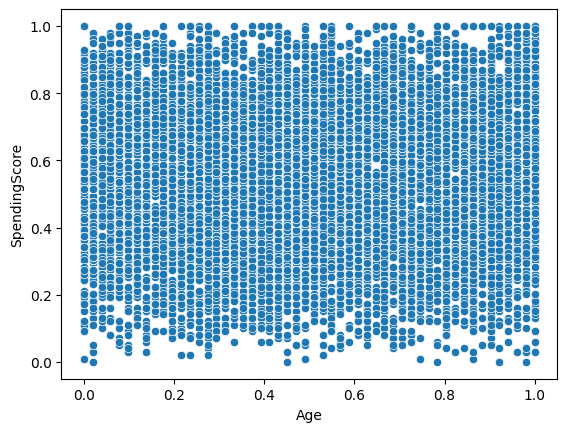

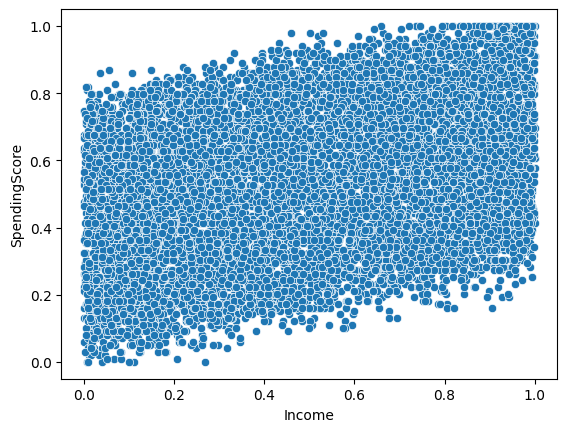

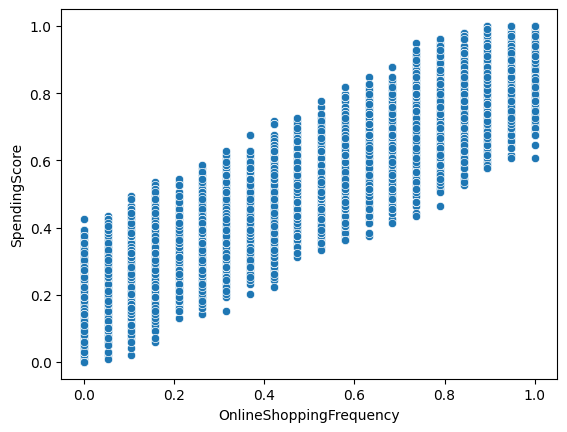

In [64]:
for i in X:
  sns.scatterplot(data = data, x = i, y = y)
  plt.show()

In [65]:
def diagnostic_plots(df, variable):

  plt.figure(figsize =(15,6))
  plt.subplot(1,2,1)
  df[variable].hist()

  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist = "norm", plot = plt)
  plt.show

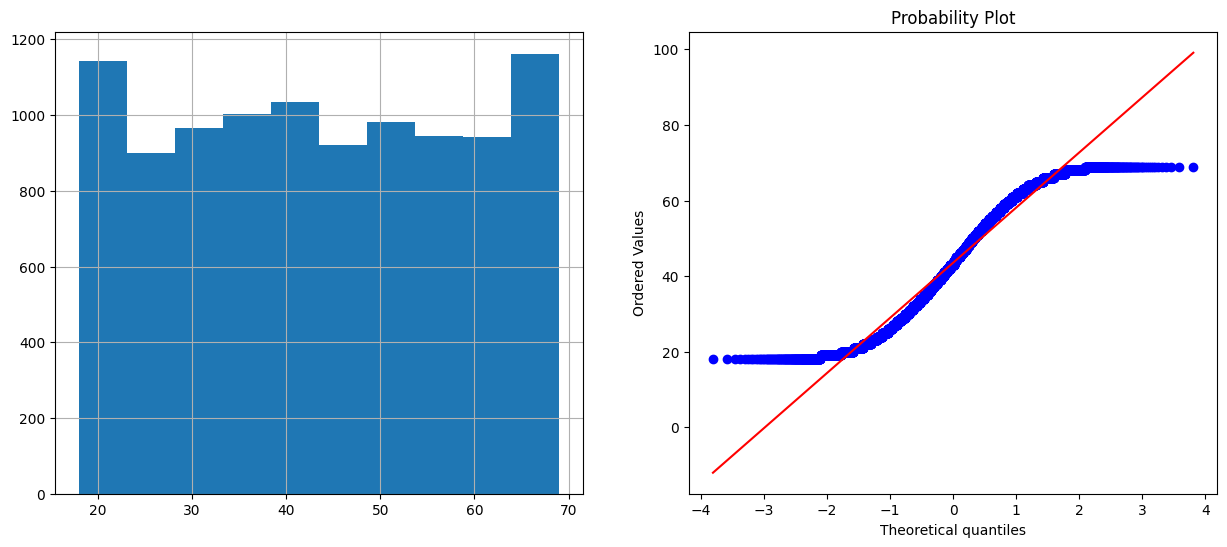

In [66]:
diagnostic_plots(df, "Age")

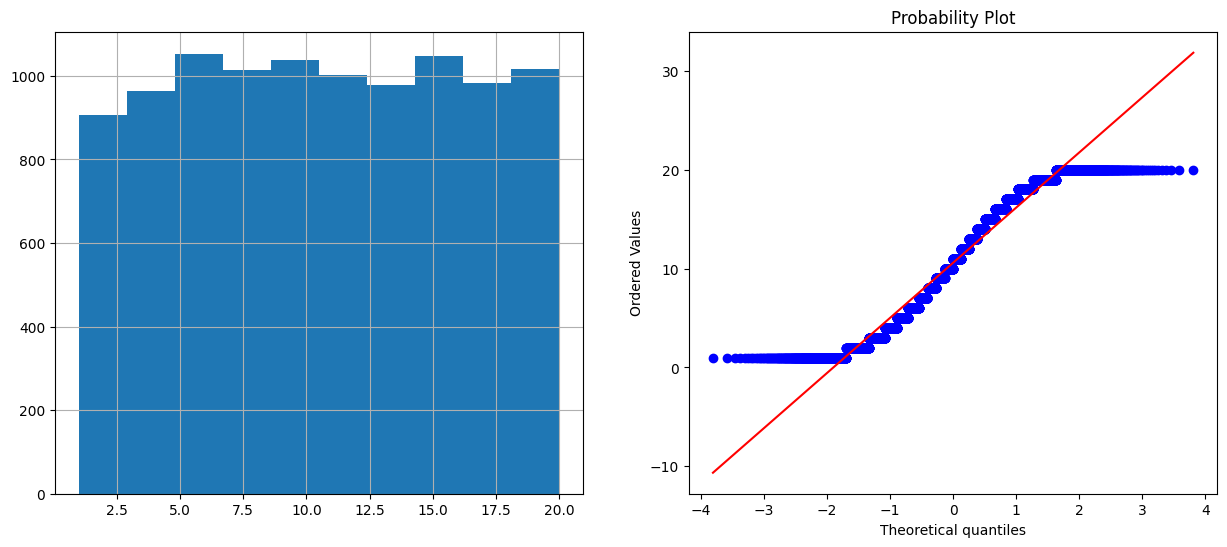

In [67]:
diagnostic_plots(df, "OnlineShoppingFrequency")

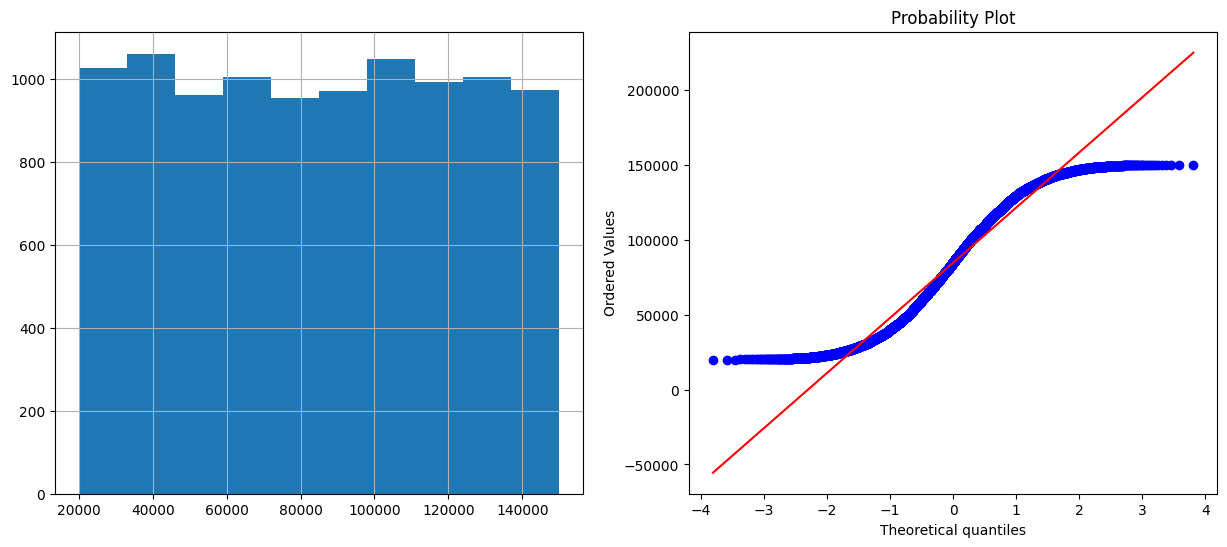

In [68]:
diagnostic_plots(df, "Income")

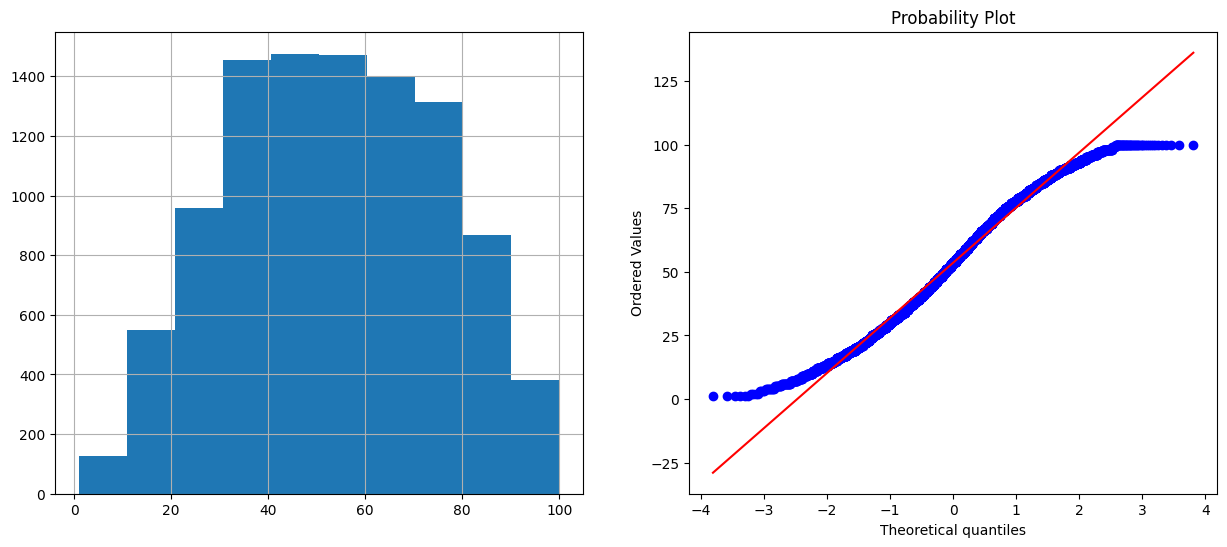

In [69]:
diagnostic_plots(df, "SpendingScore")

In [70]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.params

const                      0.062075
Age                        0.001574
Income                     0.260880
OnlineShoppingFrequency    0.670613
dtype: float64

In [71]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SpendingScore   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                 6.126e+04
Date:                Sun, 01 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:09:14   Log-Likelihood:                 15752.
No. Observations:               10000   AIC:                        -3.150e+04
Df Residuals:                    9996   BIC:                        -3.147e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0621      0.002     39.600      0.000       0.059       0.065
Age                         0.0016      0.002      0.919      0.358      -0.002       0.005
Income                      0.2609      0.002    150.948      0.000       0.257       0.264
OnlineShoppingFrequency     0.6706      0.002    402.318      0.000       0.667       0.674
==============================================================================
Omnibus:                        1.670   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.696
Skew:                          -0.030   Prob(JB):                        0.428
Kurtosis:                       2.976   Cond. No.                         6.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
#Prediction based on model
SpendingScore_predicted = results.predict(X)
print(SpendingScore_predicted)

0       0.425098
1       0.807796
2       0.674595
3       0.173558
4       0.290274
          ...   
9995    0.443856
9996    0.336793
9997    0.264496
9998    0.900217
9999    0.758392
Length: 10000, dtype: float64


In [73]:
data['pred'] = SpendingScore_predicted
data['error'] = y - SpendingScore_predicted
data.head()

Age    Income  OnlineShoppingFrequency  SpendingScore      pred  \
0  0.745098  0.845861                 0.210526       0.333333  0.425098   
1  1.000000  0.417160                 0.947368       0.909091  0.807796   
2  0.549020  0.450476                 0.736842       0.666667  0.674595   
3  0.274510  0.425677                 0.000000       0.252525  0.173558   
4  0.823529  0.328583                 0.210526       0.343434  0.290274   

      error  
0 -0.091765  
1  0.101295  
2 -0.007929  
3  0.078967  
4  0.053160

In [74]:
#computing mean square error
import sklearn.metrics
sklearn.metrics.mean_squared_error(y, data['pred'])

0.00250812283701098

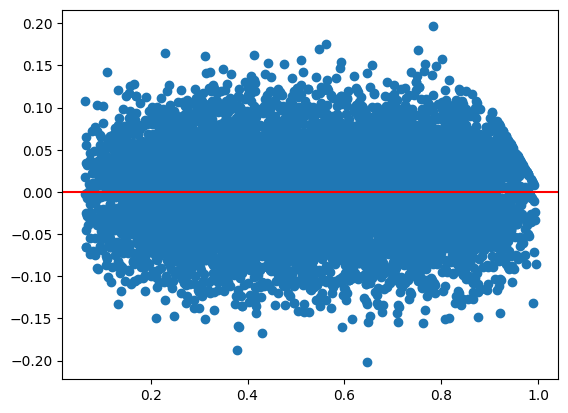

In [75]:
# Residual Plot
plt.scatter(data['pred'], data['error'])
plt.axhline(y=0.0, color='r', linestyle='-')
plt.show()

Checking if model is normally distributed

Ho: Residuals are normally distributed

Ha: Residuals are not normally distributed

In [76]:
from scipy.stats import shapiro

# Get residuals
residuals = shapiro(np.abs(data['error']))

# Shapiro-Wilk test for normality
stat, p_value = residuals

print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"p-value: {p_value:2e}")

# Interpretation
if p_value > 0.05:
    print("Residuals are likely normally distributed (fail to reject null hypothesis).")
else:
    print("Residuals are not normally distributed (reject null hypothesis).")

Shapiro-Wilk Test Statistic: 0.9277259134436717
p-value: 3.102926e-56
Residuals are not normally distributed (reject null hypothesis).


Checking for homogenity of Variance - Levene's Test

In [77]:
stat_age, p_age = levene(residuals, data["Age"])
stat_income, p_income = levene(residuals, data["Income"])
stat_freq, p_freq = levene(residuals, data["OnlineShoppingFrequency"])

# Print results
print("Levene's Test Results:")
print(f"Age - Test Statistic: {stat_age}, p-value: {p_age}")
print(f"Income - Test Statistic: {stat_income}, p-value: {p_income}")
print(f"Online Shopping Frequency - Test Statistic: {stat_freq}, p-value: {p_freq}")

# Interpretation
if p_age > 0.05:
    print("Residuals have homogeneous variance across Age (fail to reject null hypothesis).")
else:
    print("Residuals do not have homogeneous variance across Age (reject null hypothesis).")

if p_income > 0.05:
    print("Residuals have homogeneous variance across Income (fail to reject null hypothesis).")
else:
    print("Residuals do not have homogeneous variance across Income (reject null hypothesis).")

if p_freq > 0.05:
    print("Residuals have homogeneous variance across Online Shopping Frequency (fail to reject null hypothesis).")
else:
    print("Residuals do not have homogeneous variance across Online Shopping Frequency (reject null hypothesis).")

Levene's Test Results:
Age - Test Statistic: 4.085616510121528, p-value: 0.043276259231410645
Income - Test Statistic: 4.362432612241014, p-value: 0.036765031928500086
Online Shopping Frequency - Test Statistic: 3.5878266288487, p-value: 0.05823314660789812
Residuals do not have homogeneous variance across Age (reject null hypothesis).
Residuals do not have homogeneous variance across Income (reject null hypothesis).
Residuals have homogeneous variance across Online Shopping Frequency (fail to reject null hypothesis).


###TWO TAIL T TEST TO TEST IF THERE SIGNIFICANT DIFFERENT BETWEEN THE PREDICTORS

In [78]:
from scipy.stats import ttest_ind
stat_age_income, p_age_income = ttest_ind(data['Age'], data['Income'], equal_var=False)

# Age vs OnlineShoppingFrequency
stat_age_freq, p_age_freq = ttest_ind(data['Age'], data['OnlineShoppingFrequency'], equal_var=False)

# Income vs OnlineShoppingFrequency
stat_income_freq, p_income_freq = ttest_ind(data['Income'], data['OnlineShoppingFrequency'], equal_var=False)

# Print results
print("Pairwise Two-Tailed t-Test Results:")
print(f"Age vs Income - Test Statistic: {stat_age_income}, p-value: {p_age_income}")
print(f"Age vs Online Shopping Frequency - Test Statistic: {stat_age_freq}, p-value: {p_age_freq}")
print(f"Income vs Online Shopping Frequency - Test Statistic: {stat_income_freq}, p-value: {p_income_freq}")

# Interpretation
if p_age_income > 0.05:
    print("No significant difference in means between Age and Income (fail to reject null hypothesis).")
else:
    print("Significant difference in means between Age and Income (reject null hypothesis).")

if p_age_freq > 0.05:
    print("No significant difference in means between Age and Online Shopping Frequency (fail to reject null hypothesis).")
else:
    print("Significant difference in means between Age and Online Shopping Frequency (reject null hypothesis).")

if p_income_freq > 0.05:
    print("No significant difference in means between Income and Online Shopping Frequency (fail to reject null hypothesis).")
else:
    print("Significant difference in means between Income and Online Shopping Frequency (reject null hypothesis).")

Pairwise Two-Tailed t-Test Results:
Age vs Income - Test Statistic: 0.8195137513571172, p-value: 0.4125031268099075
Age vs Online Shopping Frequency - Test Statistic: -1.009466474873879, p-value: 0.31276319479901865
Income vs Online Shopping Frequency - Test Statistic: -1.8217886607907308, p-value: 0.06850200904377748
No significant difference in means between Age and Income (fail to reject null hypothesis).
No significant difference in means between Age and Online Shopping Frequency (fail to reject null hypothesis).
No significant difference in means between Income and Online Shopping Frequency (fail to reject null hypothesis).


##DEFINING OUR X AND Y FOR OUR UPCOMING ALGORITHMS

In [79]:
X = df.drop(["CustomerID", "LoyaltyProgram"],axis = 1)
X

In-Store  Online   Age  Gender    Income  SpendingScore  \
0          0.0     1.0  56.0     1.0  129952.0           34.0   
1          1.0     0.0  69.0     0.0   74235.0           91.0   
2          1.0     0.0  46.0     0.0   78565.0           67.0   
3          0.0     0.0  32.0     0.0   75342.0           26.0   
4          0.0     0.0  60.0     1.0   62723.0           35.0   
...        ...     ...   ...     ...       ...            ...   
9995       0.0     0.0  55.0     1.0   86561.0           43.0   
9996       0.0     0.0  51.0     0.0   50869.0           32.0   
9997       0.0     0.0  57.0     0.0   85094.0           33.0   
9998       1.0     0.0  64.0     1.0  120355.0           87.0   
9999       0.0     0.0  32.0     0.0   50192.0           78.0   

      OnlineShoppingFrequency  CustomerSatisfaction  PromotionalEmailsOpened  \
0                         5.0                   9.0                     40.0   
1                        19.0                   4.0                     11.0   
2                        15.0                   9.0                     19.0   
3                         1.0                   1.0                     33.0   
4                         5.0                   5.0                     35.0   
...                       ...                   ...                      ...   
9995                      8.0                   2.0                      4.0   
9996                      7.0                   7.0                     49.0   
9997                      3.0                   3.0                     21.0   
9998                     19.0                   8.0                      4.0   
9999                     19.0                   4.0                     36.0   

      ProductReturns  ConversionRate  
0                5.0        0.045971  
1                1.0        0.037305  
2                4.0        0.167028  
3                0.0        0.218419  
4                7.0        0.192754  
...              ...             ...  
9995             1.0        0.263785  
9996             0.0        0.087479  
9997             1.0        0.173484  
9998             1.0        0.236795  
9999             0.0        0.109783  

[10000 rows x 11 columns]

In [80]:
y = df["LoyaltyProgram"]
y

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
9995    1.0
9996    1.0
9997    1.0
9998    1.0
9999    1.0
Name: LoyaltyProgram, Length: 10000, dtype: float64

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Define thresholds
thresholds = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

# Initialize variable to track maximum accuracy
max_accuracy = 0
best_params = {}

# Iterate over the number of neighbors
for i in range(1, 10):
    # Initialize the KNN classifier
    NNH = KNeighborsClassifier(metric="euclidean", n_neighbors=i)
    model_KNN = NNH.fit(X_train, y_train)

    # Get predicted probabilities for the positive class
    prob_pred = model_KNN.predict_proba(X_test)[:, 1]  # Probabilities for class 1

    # Iterate over thresholds
    for threshold in thresholds:
        # Apply threshold to get predicted labels
        y_pred = (prob_pred > threshold).astype(int)

        # Calculate accuracy
        accuracy = metrics.accuracy_score(y_test, y_pred)

        # Track maximum accuracy
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_params = {'n_neighbors': i, 'threshold': threshold}

        # Print intermediate results
        print(f"Neighbors: {i}, Threshold: {threshold:.2f}, Accuracy: {accuracy:.4f}")

# Print final results
print(f"Maximum Accuracy: {max_accuracy:.4f} achieved with {best_params}")


Neighbors: 1, Threshold: 0.05, Accuracy: 0.5090
Neighbors: 1, Threshold: 0.10, Accuracy: 0.5090
Neighbors: 1, Threshold: 0.15, Accuracy: 0.5090
Neighbors: 1, Threshold: 0.20, Accuracy: 0.5090
Neighbors: 1, Threshold: 0.25, Accuracy: 0.5090
Neighbors: 1, Threshold: 0.30, Accuracy: 0.5090
Neighbors: 1, Threshold: 0.35, Accuracy: 0.5090
Neighbors: 1, Threshold: 0.40, Accuracy: 0.5090
Neighbors: 1, Threshold: 0.45, Accuracy: 0.5090
Neighbors: 1, Threshold: 0.50, Accuracy: 0.5090
Neighbors: 1, Threshold: 0.55, Accuracy: 0.5090
Neighbors: 1, Threshold: 0.60, Accuracy: 0.5090
Neighbors: 1, Threshold: 0.65, Accuracy: 0.5090
Neighbors: 1, Threshold: 0.70, Accuracy: 0.5090
Neighbors: 1, Threshold: 0.75, Accuracy: 0.5090
Neighbors: 1, Threshold: 0.80, Accuracy: 0.5090
Neighbors: 1, Threshold: 0.85, Accuracy: 0.5090
Neighbors: 1, Threshold: 0.90, Accuracy: 0.5090
Neighbors: 1, Threshold: 0.95, Accuracy: 0.5090
Neighbors: 2, Threshold: 0.05, Accuracy: 0.5040
Neighbors: 2, Threshold: 0.10, Accuracy:

In [83]:
NNH = KNeighborsClassifier(metric="euclidean", n_neighbors=8)
model_KNN = NNH.fit(X_train, y_train)
predicted_labels = model_KNN.predict(X_test)
predicted_labels

array([1., 0., 1., ..., 1., 1., 0.])

Accuracy 0.5165


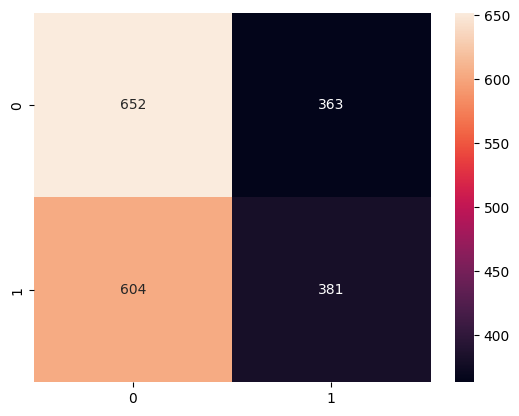

In [84]:
y_pred = model_KNN.predict(X_test)
y_pred = (y_pred > 0.5)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "");

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.52
Precision: 0.51
Recall: 0.39
F1 Score: 0.44

Classification Report:

              precision    recall  f1-score   support

         0.0       0.52      0.64      0.57      1015
         1.0       0.51      0.39      0.44       985

    accuracy                           0.52      2000
   macro avg       0.52      0.51      0.51      2000
weighted avg       0.52      0.52      0.51      2000



##Naive Bayes

In [86]:
features = df[["Age", "Income", "SpendingScore","OnlineShoppingFrequency"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.2, random_state = 42)
from sklearn.naive_bayes import GaussianNB
naiveClassifier = GaussianNB()
nb_classifier = naiveClassifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

In [87]:
prob_pred = nb_classifier.predict_proba(X_test)[:, 1]

# Initialize variables to track maximum accuracy and corresponding threshold
max_accuracy = 0
best_threshold = 0

# Iterate through each threshold
for threshold in thresholds:
    # Apply threshold
    y_pred = (prob_pred > threshold).astype(int)

    # Calculate accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)

    # Check if the current accuracy is the highest
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_threshold = threshold

    # Print results for each threshold
    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracy:.4f}")

# After the loop, print the maximum accuracy and the corresponding threshold
print(f"\nMaximum Accuracy: {max_accuracy:.4f} at Threshold: {best_threshold:.2f}")

Threshold: 0.05, Accuracy: 0.4925
Threshold: 0.10, Accuracy: 0.4925
Threshold: 0.15, Accuracy: 0.4925
Threshold: 0.20, Accuracy: 0.4925
Threshold: 0.25, Accuracy: 0.4925
Threshold: 0.30, Accuracy: 0.4925
Threshold: 0.35, Accuracy: 0.4925
Threshold: 0.40, Accuracy: 0.4925
Threshold: 0.45, Accuracy: 0.4925
Threshold: 0.50, Accuracy: 0.4815
Threshold: 0.55, Accuracy: 0.5075
Threshold: 0.60, Accuracy: 0.5075
Threshold: 0.65, Accuracy: 0.5075
Threshold: 0.70, Accuracy: 0.5075
Threshold: 0.75, Accuracy: 0.5075
Threshold: 0.80, Accuracy: 0.5075
Threshold: 0.85, Accuracy: 0.5075
Threshold: 0.90, Accuracy: 0.5075
Threshold: 0.95, Accuracy: 0.5075

Maximum Accuracy: 0.5075 at Threshold: 0.55


Accuracy 0.5075


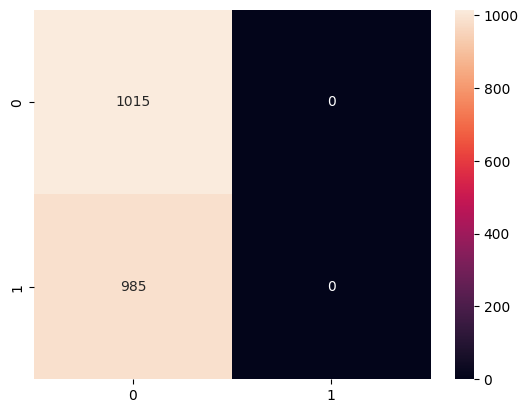

In [88]:
from sklearn import metrics

y_pred = (y_pred > 0.55)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "");

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.51
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

Classification Report:

              precision    recall  f1-score   support

         0.0       0.51      1.00      0.67      1015
         1.0       0.00      0.00      0.00       985

    accuracy                           0.51      2000
   macro avg       0.25      0.50      0.34      2000
weighted avg       0.26      0.51      0.34      2000



We can see from the above classfication report that NAIVE BAYES is predicting really bad

##Decision Trees

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
clf = DecisionTreeClassifier()

In [93]:
parameters = [{"max_depth" : [1,2,3,4,5,6,7,8,9,10,15,20,25,30], "min_samples_split" : [1,2,3,4,5,6,7,8,9,10], "min_samples_leaf": [1, 2,3, 4,5],
    "max_features": [None, "sqrt", "log2"],
}]

In [94]:
"""grid_search = GridSearchCV(
    estimator=clf,
    param_grid=parameters,
    scoring="f1",
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_) """

'grid_search = GridSearchCV(\n    estimator=clf,\n    param_grid=parameters,\n    scoring="f1",\n    cv=5,  # 5-fold cross-validation\n    verbose=2,\n    n_jobs=-1\n)\n\ngrid_search.fit(X_train, y_train)\n\n# Best parameters and score\nprint("Best Parameters:", grid_search.best_params_)\nprint("Best Cross-Validation Accuracy:", grid_search.best_score_) '

In [95]:
clf = DecisionTreeClassifier(max_depth = 1, max_features = "sqrt", min_samples_leaf = 2, min_samples_split =  4)

In [96]:
X = df.drop(["CustomerID", "LoyaltyProgram"],axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [97]:
prob_pred = clf.predict_proba(X_test)[:, 1]

# Initialize variables to track maximum accuracy and corresponding threshold
max_accuracy = 0
best_threshold = 0

# Iterate through each threshold
for threshold in thresholds:
    # Apply threshold
    y_pred = (prob_pred > threshold).astype(int)

    # Calculate accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)

    # Check if the current accuracy is the highest
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_threshold = threshold

    # Print results for each threshold
    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracy:.4f}")

# After the loop, print the maximum accuracy and the corresponding threshold
print(f"\nMaximum Accuracy: {max_accuracy:.4f} at Threshold: {best_threshold:.2f}")

Threshold: 0.05, Accuracy: 0.4925
Threshold: 0.10, Accuracy: 0.4925
Threshold: 0.15, Accuracy: 0.4925
Threshold: 0.20, Accuracy: 0.4925
Threshold: 0.25, Accuracy: 0.4925
Threshold: 0.30, Accuracy: 0.4925
Threshold: 0.35, Accuracy: 0.4925
Threshold: 0.40, Accuracy: 0.4925
Threshold: 0.45, Accuracy: 0.4925
Threshold: 0.50, Accuracy: 0.4995
Threshold: 0.55, Accuracy: 0.5075
Threshold: 0.60, Accuracy: 0.5075
Threshold: 0.65, Accuracy: 0.5075
Threshold: 0.70, Accuracy: 0.5075
Threshold: 0.75, Accuracy: 0.5075
Threshold: 0.80, Accuracy: 0.5075
Threshold: 0.85, Accuracy: 0.5075
Threshold: 0.90, Accuracy: 0.5075
Threshold: 0.95, Accuracy: 0.5075

Maximum Accuracy: 0.5075 at Threshold: 0.55


Accuracy 0.4995


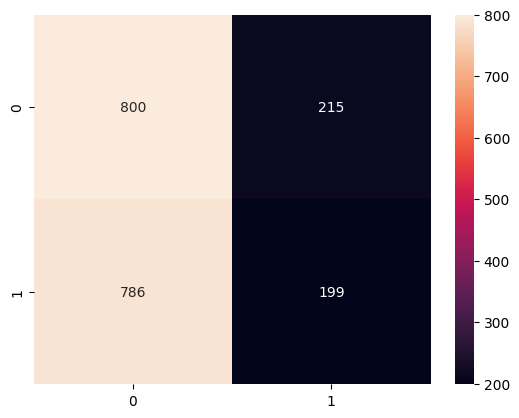

In [98]:
y_pred = clf.predict(X_test)
y_pred = (y_pred > 0.55)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "");

In [99]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.50
Precision: 0.48
Recall: 0.20
F1 Score: 0.28

Classification Report:

              precision    recall  f1-score   support

         0.0       0.50      0.79      0.62      1015
         1.0       0.48      0.20      0.28       985

    accuracy                           0.50      2000
   macro avg       0.49      0.50      0.45      2000
weighted avg       0.49      0.50      0.45      2000



##LOGISTIC REGRESSION

In [100]:
features = df[["Age", "Income", "SpendingScore", "OnlineShoppingFrequency"]]

In [101]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.2, random_state = 42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
log_reg = LogisticRegression()
model = log_reg.fit(X_train, y_train)

In [103]:
predicted_labels = model.predict(X_test)

Feature: Age, Coefficient: 0.0838, Odds Ratio: 1.0874
Feature: Income, Coefficient: 0.0281, Odds Ratio: 1.0284
Feature: SpendingScore, Coefficient: 0.0102, Odds Ratio: 1.0102
Feature: OnlineShoppingFrequency, Coefficient: -0.0253, Odds Ratio: 0.9750


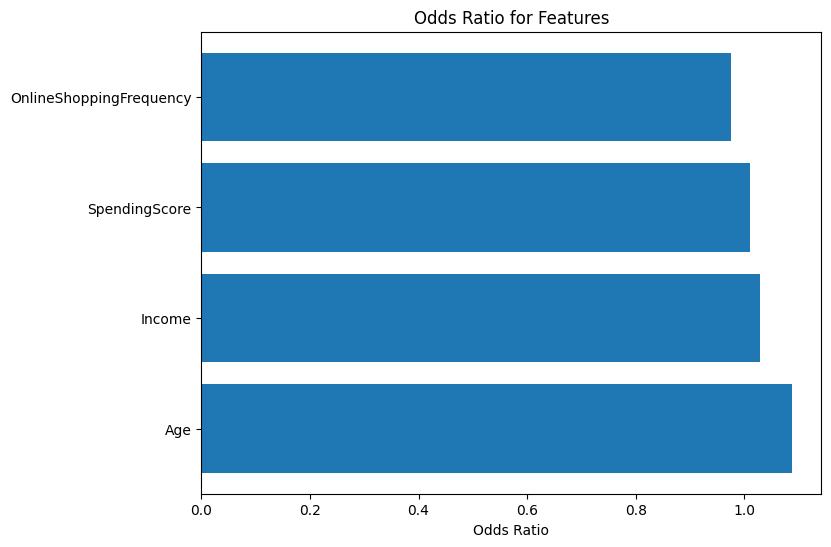

In [104]:
# Get the coefficients of the model
coefficients = model.coef_[0]
features = features.columns

# Calculate the odds ratio for each coefficient
odds_ratios = np.exp(coefficients)

# Print coefficients and odds ratios
for feature, coef, odds in zip(features, coefficients, odds_ratios):
    print(f"Feature: {feature}, Coefficient: {coef:.4f}, Odds Ratio: {odds:.4f}")

plt.figure(figsize=(8,6))
plt.barh(features, odds_ratios)
plt.xlabel('Odds Ratio')
plt.title('Odds Ratio for Features')
plt.show()


Accuracy 0.4795


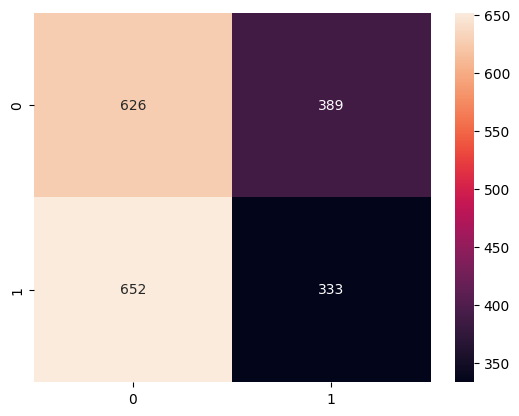

In [105]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.50)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "");

In [106]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.49      0.62      0.55      1015
         1.0       0.46      0.34      0.39       985

    accuracy                           0.48      2000
   macro avg       0.48      0.48      0.47      2000
weighted avg       0.48      0.48      0.47      2000



#END-TO-END MODELLING

#Working with each cluster

The table below shows the average and mode for each cluster

In [107]:
combined_analysis

Cluster        Age         Income  SpendingScore  OnlineShoppingFrequency  \
0        0  43.353807  117485.172486      79.278502                16.004207   
1        1  43.478959   52506.434966      63.049732                15.079572   
2        2  43.416807   51518.632179      28.067568                 5.288851   
3        3  43.876183  116669.348353      44.018932                 6.045816   

   CustomerSatisfaction  PromotionalEmailsOpened  ProductReturns  \
0              5.491796                24.469499        4.587295   
1              5.545907                24.263963        4.545524   
2              5.539274                24.689611        4.404983   
3              5.535025                24.942067        4.558501   

   ConversionRate PreferredChannel  Gender LoyaltyProgram  
0        0.152780         In-Store    Male             No  
1        0.155913         In-Store  Female            Yes  
2        0.154892         In-Store  Female             No  
3        0.157439             Both    Male             No

In [108]:
df2.head()

Both  In-Store  Online  CustomerID   Age  Gender    Income  SpendingScore  \
0   0.0       0.0     1.0         1.0  56.0     1.0  129952.0           34.0   
1   0.0       1.0     0.0         2.0  69.0     0.0   74235.0           91.0   
2   0.0       1.0     0.0         3.0  46.0     0.0   78565.0           67.0   
3   1.0       0.0     0.0         4.0  32.0     0.0   75342.0           26.0   
4   1.0       0.0     0.0         5.0  60.0     1.0   62723.0           35.0   

   OnlineShoppingFrequency  CustomerSatisfaction  PromotionalEmailsOpened  \
0                      5.0                   9.0                     40.0   
1                     19.0                   4.0                     11.0   
2                     15.0                   9.0                     19.0   
3                      1.0                   1.0                     33.0   
4                      5.0                   5.0                     35.0   

   ProductReturns  LoyaltyProgram  ConversionRate  Cluster  
0             5.0             0.0        0.045971        3  
1             1.0             0.0        0.037305        0  
2             4.0             1.0        0.167028        1  
3             0.0             0.0        0.218419        2  
4             7.0             0.0        0.192754        2

#COMPARING THE ACCURACY FOR EACH CLUSTER AND ALL WITH SAME FEATURES

###NAIVE BAYES


Cluster 0 Analysis
Cluster size: 2377 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.53      0.50       245
         1.0       0.44      0.40      0.42       231

    accuracy                           0.47       476
   macro avg       0.46      0.46      0.46       476
weighted avg       0.46      0.47      0.46       476


Cluster 1 Analysis
Cluster size: 2614 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.59      0.53       242
         1.0       0.56      0.44      0.49       281

    accuracy                           0.51       523
   macro avg       0.52      0.52      0.51       523
weighted avg       0.52      0.51      0.51       523


Cluster 2 Analysis
Cluster size: 2368 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.51      0.54       265
         1.0       0.45 

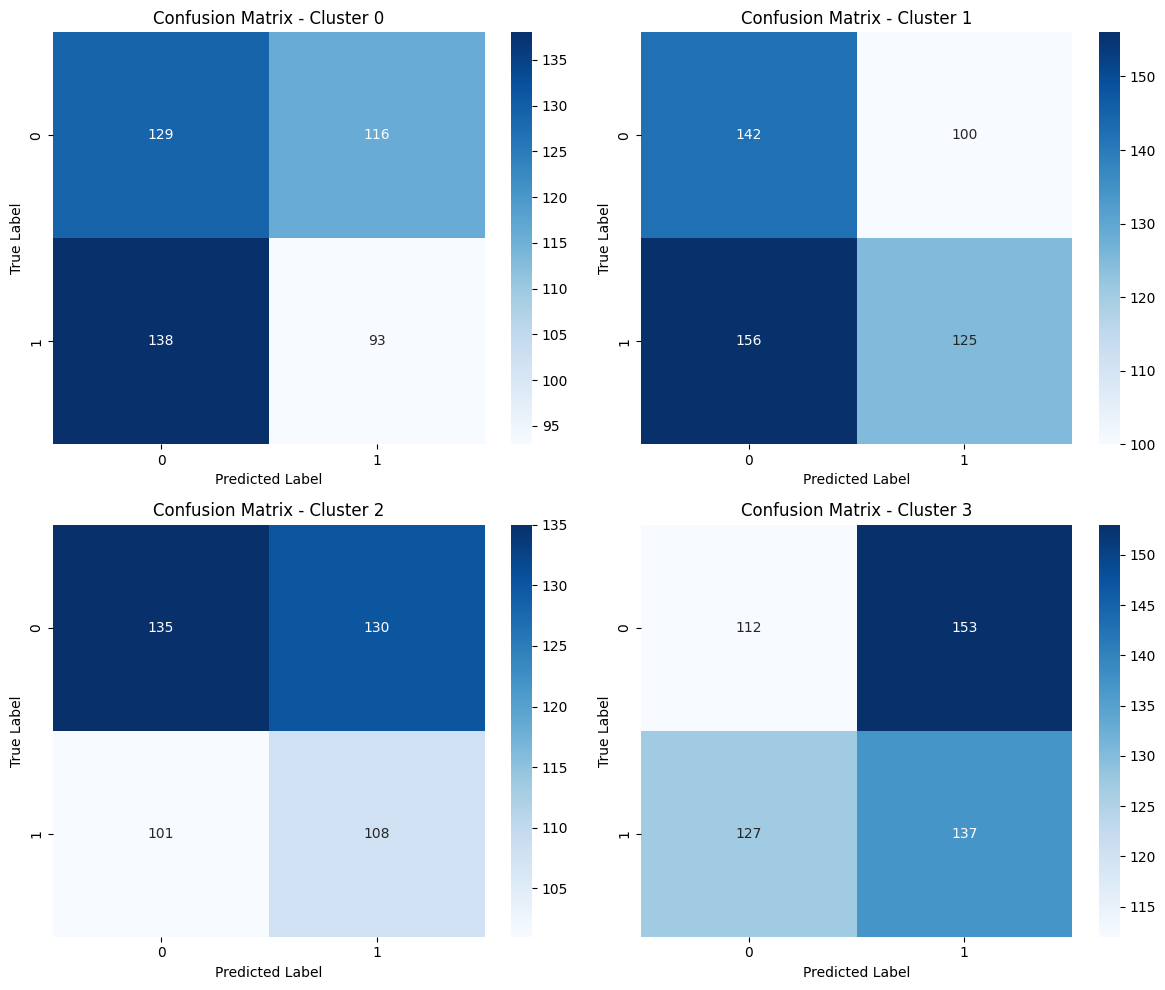

In [109]:
features = ['In-Store', 'Online', 'CustomerID', 'Age', 'Gender',
           'Income', 'SpendingScore', 'OnlineShoppingFrequency',
           'CustomerSatisfaction', 'PromotionalEmailsOpened', 'ProductReturns',
           'ConversionRate']

n_clusters = len(df2['Cluster'].unique())
n_rows = (n_clusters + 1) // 2  # Ceil division for number of rows
fig, axes = plt.subplots(n_rows, 2, figsize=(12, 5*n_rows))
axes = axes.flatten()

for i, cluster in enumerate(sorted(df2['Cluster'].unique())):
    print(f"\n{'='*50}")
    print(f"Cluster {cluster} Analysis")
    print(f"{'='*50}")

    # Get data for this cluster
    cluster_data = df2[df2['Cluster'] == cluster]
    print(f"Cluster size: {len(cluster_data)} samples")

    X = cluster_data[features]
    y = cluster_data['LoyaltyProgram']

    # Split and train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # Train Naive Bayes
    nb = GaussianNB()
    nb.fit(X_train, y_train)

    # Get predictions
    y_pred = nb.predict(X_test)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - Cluster {cluster}')
    axes[i].set_ylabel('True Label')
    axes[i].set_xlabel('Predicted Label')
# Remove any empty subplots
for idx in range(n_clusters, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

###KNN


Cluster 0 Analysis
Cluster size: 2377 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.53      0.52       245
         1.0       0.48      0.47      0.48       231

    accuracy                           0.50       476
   macro avg       0.50      0.50      0.50       476
weighted avg       0.50      0.50      0.50       476


Cluster 1 Analysis
Cluster size: 2614 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.46      0.48      0.47       242
         1.0       0.53      0.51      0.52       281

    accuracy                           0.50       523
   macro avg       0.50      0.50      0.50       523
weighted avg       0.50      0.50      0.50       523


Cluster 2 Analysis
Cluster size: 2368 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.52      0.46      0.49       265
         1.0       0.40 

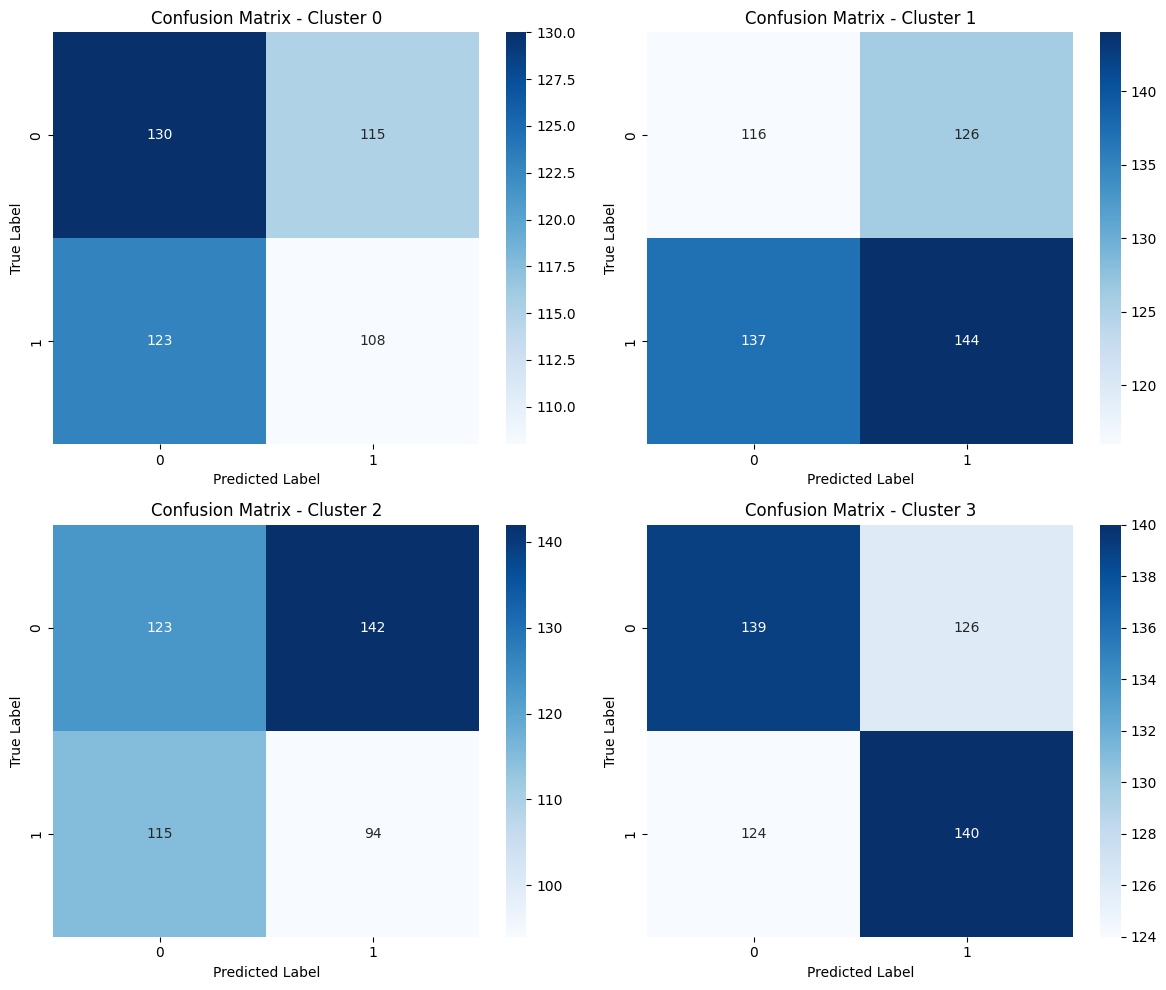

In [110]:
n_clusters = len(df2['Cluster'].unique())
n_rows = (n_clusters + 1) // 2  # Ceil division for number of rows
fig, axes = plt.subplots(n_rows, 2, figsize=(12, 5*n_rows))
axes = axes.flatten()

for i, cluster in enumerate(sorted(df2['Cluster'].unique())):
    print(f"\n{'='*50}")
    print(f"Cluster {cluster} Analysis")
    print(f"{'='*50}")

    cluster_data = df2[df2['Cluster'] == cluster]
    print(f"Cluster size: {len(cluster_data)} samples")

    X = cluster_data[features]
    y = cluster_data['LoyaltyProgram']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - Cluster {cluster}')
    axes[i].set_ylabel('True Label')
    axes[i].set_xlabel('Predicted Label')

# Remove unused axes if any
for idx in range(n_clusters, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

###CART


Cluster 0 Analysis
Cluster size: 2377 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.07      0.12       245
         1.0       0.49      0.97      0.65       231

    accuracy                           0.50       476
   macro avg       0.60      0.52      0.39       476
weighted avg       0.60      0.50      0.38       476


Cluster 1 Analysis
Cluster size: 2614 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.49      0.14      0.21       242
         1.0       0.54      0.88      0.67       281

    accuracy                           0.53       523
   macro avg       0.51      0.51      0.44       523
weighted avg       0.52      0.53      0.46       523


Cluster 2 Analysis
Cluster size: 2368 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.17      0.26       265
         1.0       0.45 

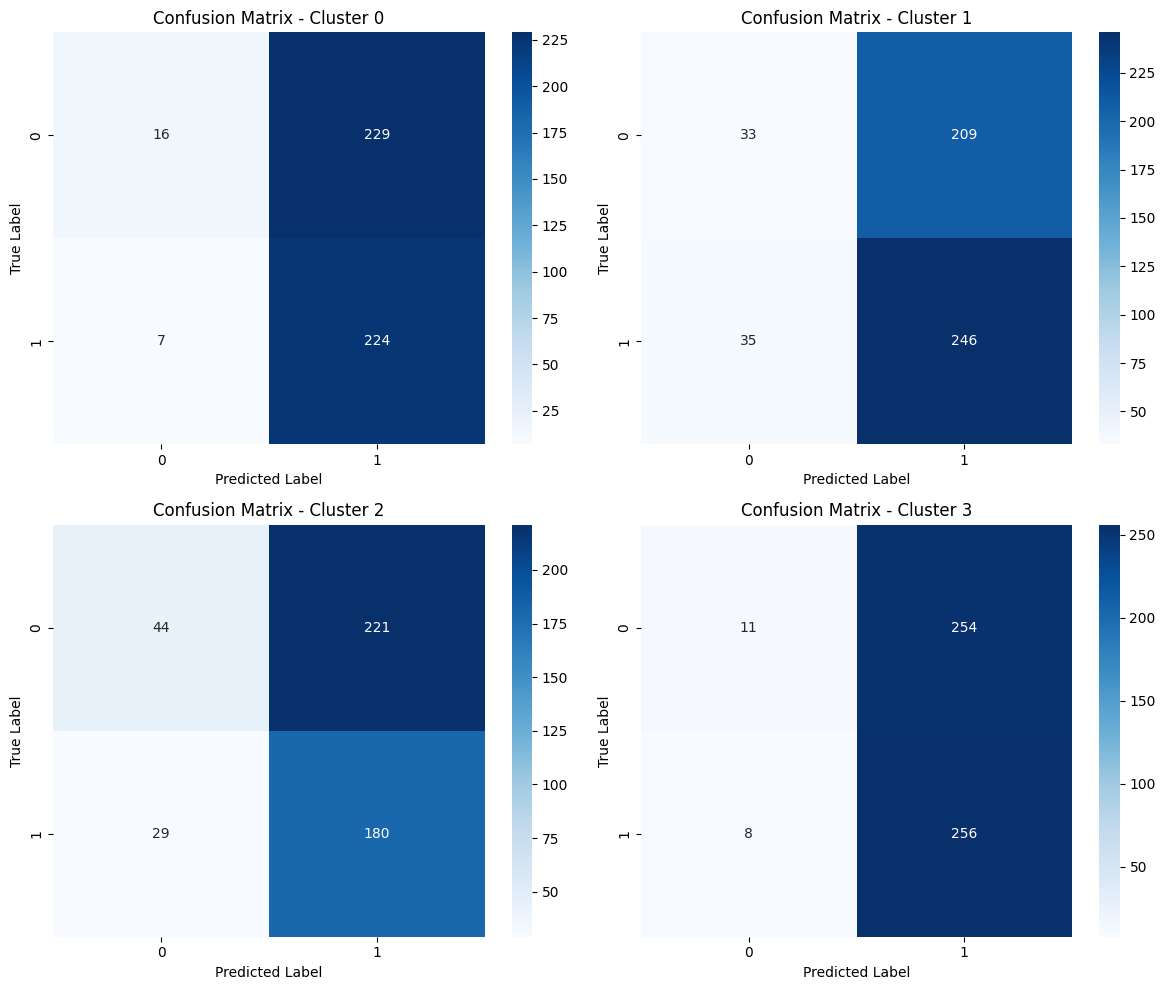

In [111]:
n_clusters = len(df2['Cluster'].unique())
n_rows = (n_clusters + 1) // 2  # Ceil division for number of rows
fig, axes = plt.subplots(n_rows, 2, figsize=(12, 5*n_rows))
axes = axes.flatten()

for i, cluster in enumerate(sorted(df2['Cluster'].unique())):
    print(f"\n{'='*50}")
    print(f"Cluster {cluster} Analysis")
    print(f"{'='*50}")

    cluster_data = df2[df2['Cluster'] == cluster]
    print(f"Cluster size: {len(cluster_data)} samples")

    X = cluster_data[features]
    y = cluster_data['LoyaltyProgram']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = DecisionTreeClassifier(max_depth = 4, max_features = "log2", min_samples_leaf = 2, min_samples_split =  8)
    clf.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - Cluster {cluster}')
    axes[i].set_ylabel('True Label')
    axes[i].set_xlabel('Predicted Label')

# Remove unused axes if any
for idx in range(n_clusters, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

###LOGISTIC REGRESSION


Cluster 0 Analysis
Cluster size: 2377 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.52      0.56      0.54       245
         1.0       0.50      0.45      0.47       231

    accuracy                           0.51       476
   macro avg       0.51      0.51      0.51       476
weighted avg       0.51      0.51      0.51       476


Cluster 1 Analysis
Cluster size: 2614 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.54      0.51       242
         1.0       0.55      0.49      0.52       281

    accuracy                           0.51       523
   macro avg       0.52      0.52      0.51       523
weighted avg       0.52      0.51      0.51       523


Cluster 2 Analysis
Cluster size: 2368 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.45      0.50       265
         1.0       0.43 

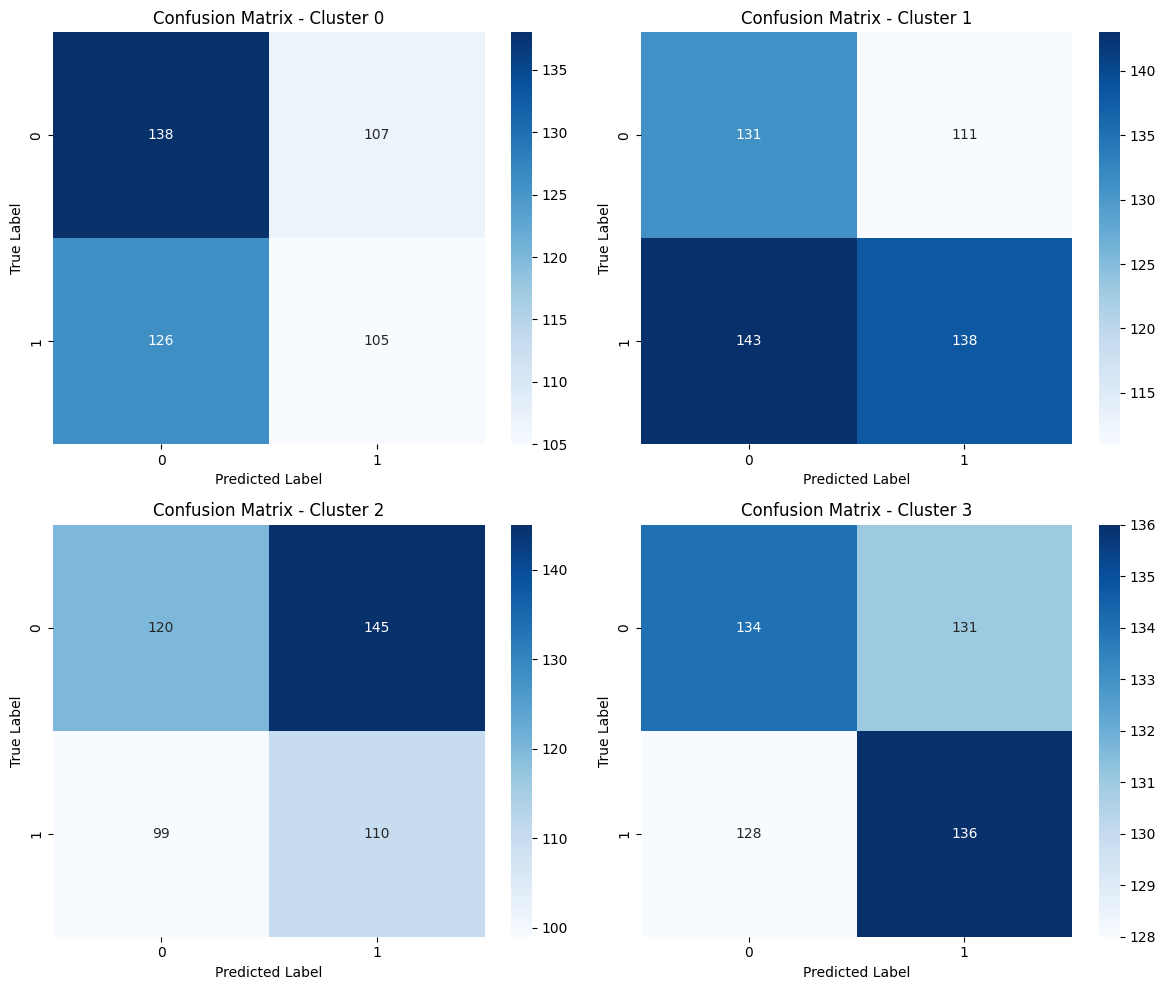

In [112]:
n_clusters = len(df2['Cluster'].unique())
n_rows = (n_clusters + 1) // 2  # Ceil division for number of rows
fig, axes = plt.subplots(n_rows, 2, figsize=(12, 5*n_rows))
axes = axes.flatten()

for i, cluster in enumerate(sorted(df2['Cluster'].unique())):
    print(f"\n{'='*50}")
    print(f"Cluster {cluster} Analysis")
    print(f"{'='*50}")

    cluster_data = df2[df2['Cluster'] == cluster]
    print(f"Cluster size: {len(cluster_data)} samples")

    X = cluster_data[features]
    y = cluster_data['LoyaltyProgram']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)

    y_pred = log_reg.predict(X_test)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - Cluster {cluster}')
    axes[i].set_ylabel('True Label')
    axes[i].set_xlabel('Predicted Label')

# Remove unused axes if any
for idx in range(n_clusters, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

#Comparing clusters, each with distinct clusters and the required features as specified in the guidelines

###NAIVE BAYES


Cluster 0 Analysis
Cluster size: 2377 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.49      0.60      0.54       245
         1.0       0.45      0.35      0.40       231

    accuracy                           0.48       476
   macro avg       0.47      0.48      0.47       476
weighted avg       0.47      0.48      0.47       476


Cluster 1 Analysis
Cluster size: 2614 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.46      0.63      0.53       242
         1.0       0.53      0.35      0.42       281

    accuracy                           0.48       523
   macro avg       0.49      0.49      0.48       523
weighted avg       0.49      0.48      0.47       523


Cluster 2 Analysis
Cluster size: 2368 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.57      0.57       265
         1.0       0.46 

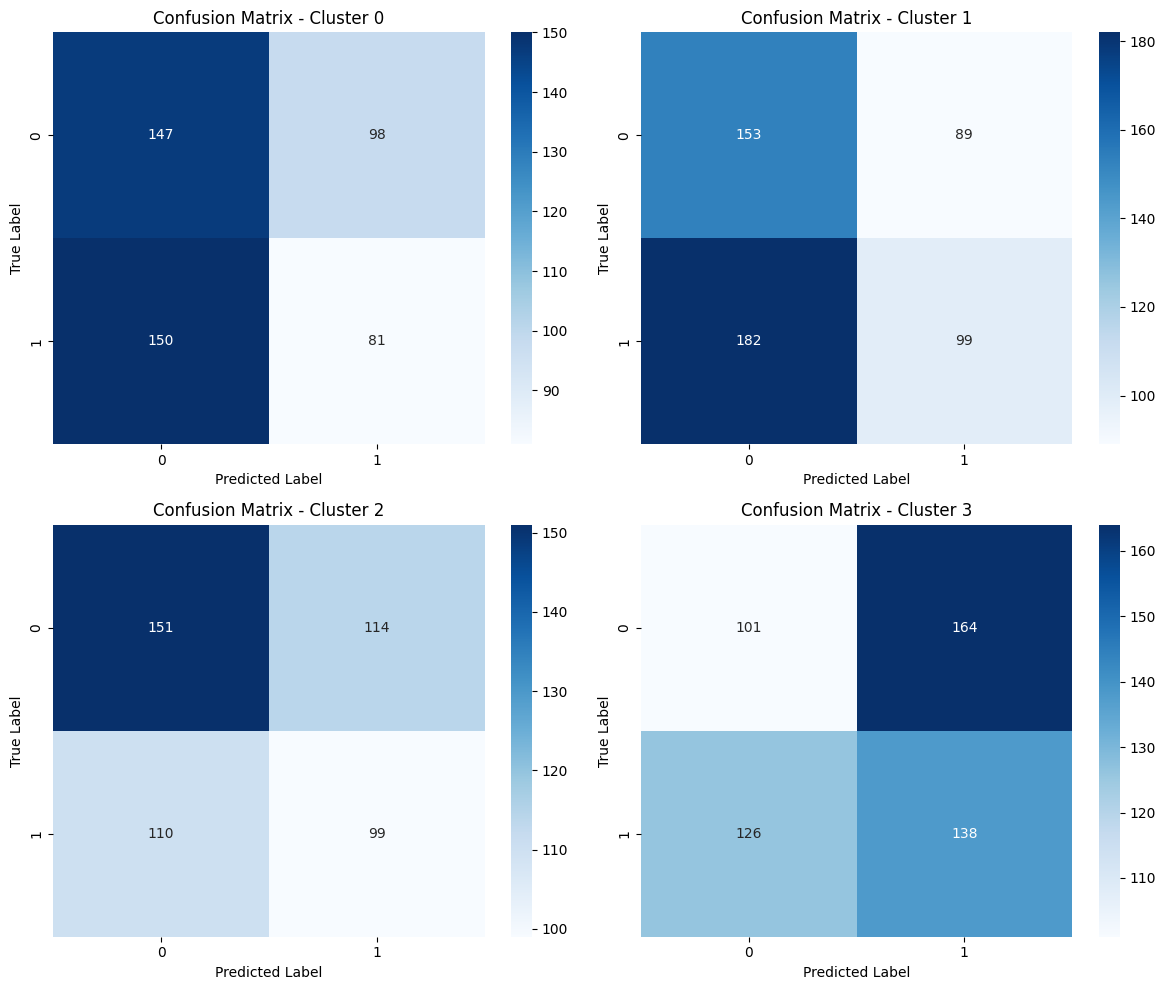

In [113]:
features = ['Age','Income', 'SpendingScore', "OnlineShoppingFrequency"]

n_clusters = len(df2['Cluster'].unique())
n_rows = (n_clusters + 1) // 2  # Ceil division for number of rows
fig, axes = plt.subplots(n_rows, 2, figsize=(12, 5*n_rows))
axes = axes.flatten()

for i, cluster in enumerate(sorted(df2['Cluster'].unique())):
    print(f"\n{'='*50}")
    print(f"Cluster {cluster} Analysis")
    print(f"{'='*50}")

    # Get data for this cluster
    cluster_data = df2[df2['Cluster'] == cluster]
    print(f"Cluster size: {len(cluster_data)} samples")

    X = cluster_data[features]
    y = cluster_data['LoyaltyProgram']

    # Split and train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # Train Naive Bayes
    nb = GaussianNB()
    nb.fit(X_train, y_train)

    # Get predictions
    y_pred = nb.predict(X_test)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - Cluster {cluster}')
    axes[i].set_ylabel('True Label')
    axes[i].set_xlabel('Predicted Label')
# Remove any empty subplots
for idx in range(n_clusters, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

###KNN


Cluster 0 Analysis
Cluster size: 2377 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.53      0.52       245
         1.0       0.48      0.47      0.48       231

    accuracy                           0.50       476
   macro avg       0.50      0.50      0.50       476
weighted avg       0.50      0.50      0.50       476


Cluster 1 Analysis
Cluster size: 2614 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.46      0.48      0.47       242
         1.0       0.53      0.51      0.52       281

    accuracy                           0.50       523
   macro avg       0.50      0.50      0.50       523
weighted avg       0.50      0.50      0.50       523


Cluster 2 Analysis
Cluster size: 2368 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.52      0.46      0.49       265
         1.0       0.40 

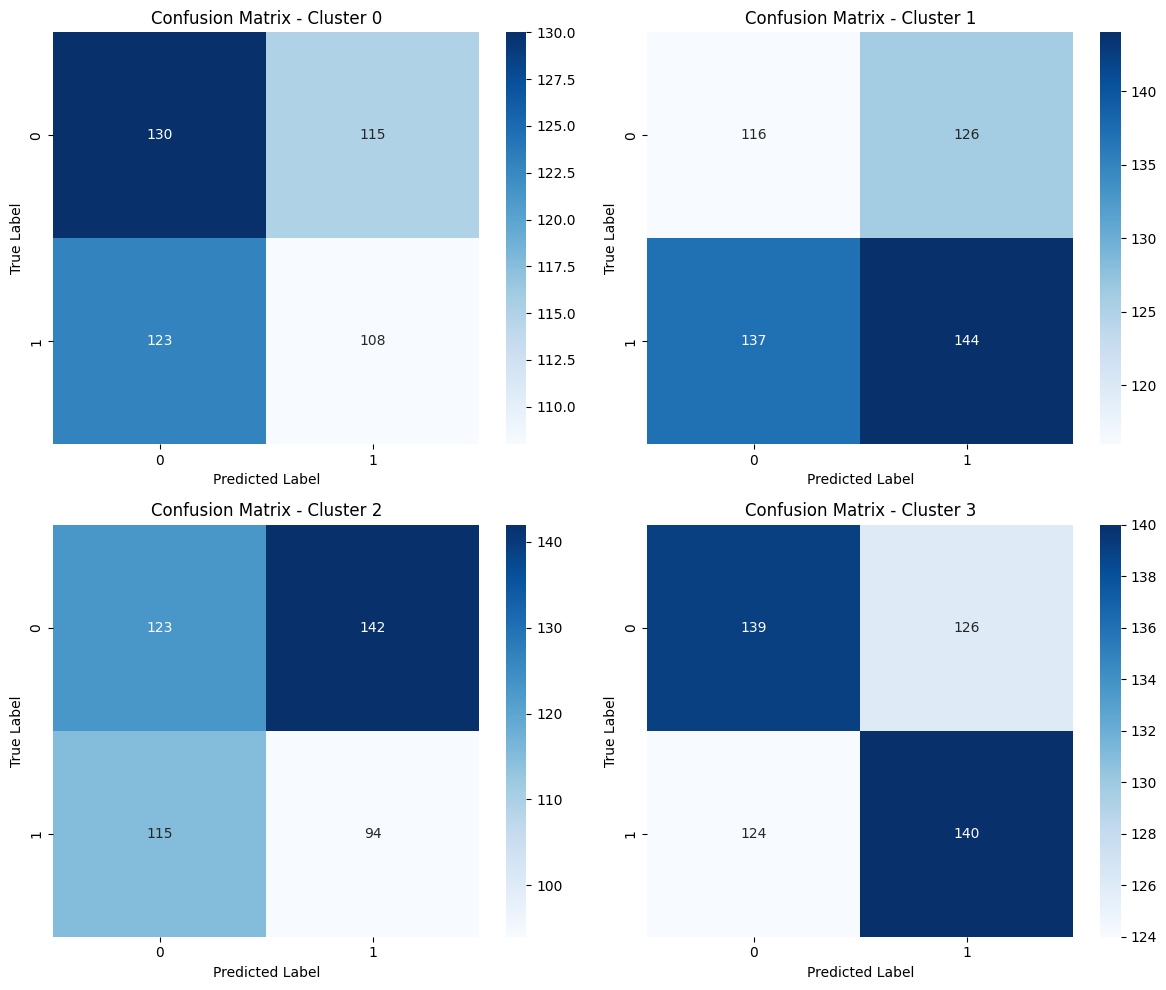

In [114]:
features = ['In-Store', 'Online', 'CustomerID', 'Age', 'Gender',
           'Income', 'SpendingScore', 'OnlineShoppingFrequency',
           'CustomerSatisfaction', 'PromotionalEmailsOpened', 'ProductReturns',
           'ConversionRate']

n_clusters = len(df2['Cluster'].unique())
n_rows = (n_clusters + 1) // 2  # Ceil division for number of rows
fig, axes = plt.subplots(n_rows, 2, figsize=(12, 5*n_rows))
axes = axes.flatten()

for i, cluster in enumerate(sorted(df2['Cluster'].unique())):
    print(f"\n{'='*50}")
    print(f"Cluster {cluster} Analysis")
    print(f"{'='*50}")

    cluster_data = df2[df2['Cluster'] == cluster]
    print(f"Cluster size: {len(cluster_data)} samples")

    X = cluster_data[features]
    y = cluster_data['LoyaltyProgram']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - Cluster {cluster}')
    axes[i].set_ylabel('True Label')
    axes[i].set_xlabel('Predicted Label')

# Remove unused axes if any
for idx in range(n_clusters, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

###CART


Cluster 0 Analysis
Cluster size: 2377 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.07      0.12       245
         1.0       0.49      0.97      0.65       231

    accuracy                           0.50       476
   macro avg       0.60      0.52      0.39       476
weighted avg       0.60      0.50      0.38       476


Cluster 1 Analysis
Cluster size: 2614 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.49      0.14      0.21       242
         1.0       0.54      0.88      0.67       281

    accuracy                           0.53       523
   macro avg       0.51      0.51      0.44       523
weighted avg       0.52      0.53      0.46       523


Cluster 2 Analysis
Cluster size: 2368 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.17      0.26       265
         1.0       0.45 

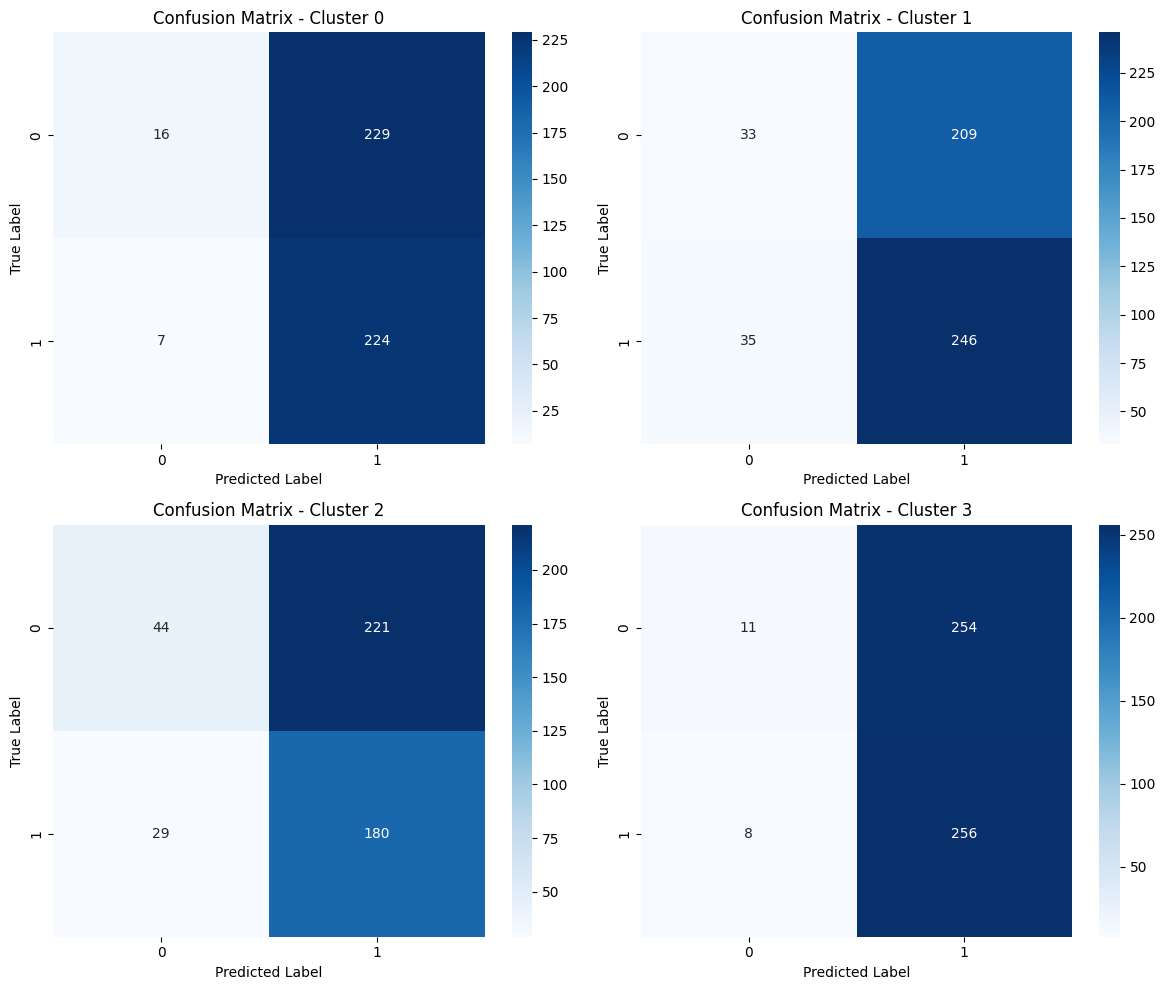

In [115]:
n_clusters = len(df2['Cluster'].unique())
n_rows = (n_clusters + 1) // 2  # Ceil division for number of rows
fig, axes = plt.subplots(n_rows, 2, figsize=(12, 5*n_rows))
axes = axes.flatten()

for i, cluster in enumerate(sorted(df2['Cluster'].unique())):
    print(f"\n{'='*50}")
    print(f"Cluster {cluster} Analysis")
    print(f"{'='*50}")

    cluster_data = df2[df2['Cluster'] == cluster]
    print(f"Cluster size: {len(cluster_data)} samples")

    X = cluster_data[features]
    y = cluster_data['LoyaltyProgram']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = DecisionTreeClassifier(max_depth = 4, max_features = "log2", min_samples_leaf = 2, min_samples_split =  8)
    clf.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - Cluster {cluster}')
    axes[i].set_ylabel('True Label')
    axes[i].set_xlabel('Predicted Label')

# Remove unused axes if any
for idx in range(n_clusters, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

###LOGISTIC REGRESSION


Cluster 0 Analysis
Cluster size: 2377 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.52      0.63      0.57       245
         1.0       0.49      0.37      0.42       231

    accuracy                           0.51       476
   macro avg       0.50      0.50      0.50       476
weighted avg       0.50      0.51      0.50       476


Cluster 1 Analysis
Cluster size: 2614 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.60      0.53       242
         1.0       0.56      0.44      0.49       281

    accuracy                           0.51       523
   macro avg       0.52      0.52      0.51       523
weighted avg       0.52      0.51      0.51       523


Cluster 2 Analysis
Cluster size: 2368 samples

Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.45      0.50       265
         1.0       0.43 

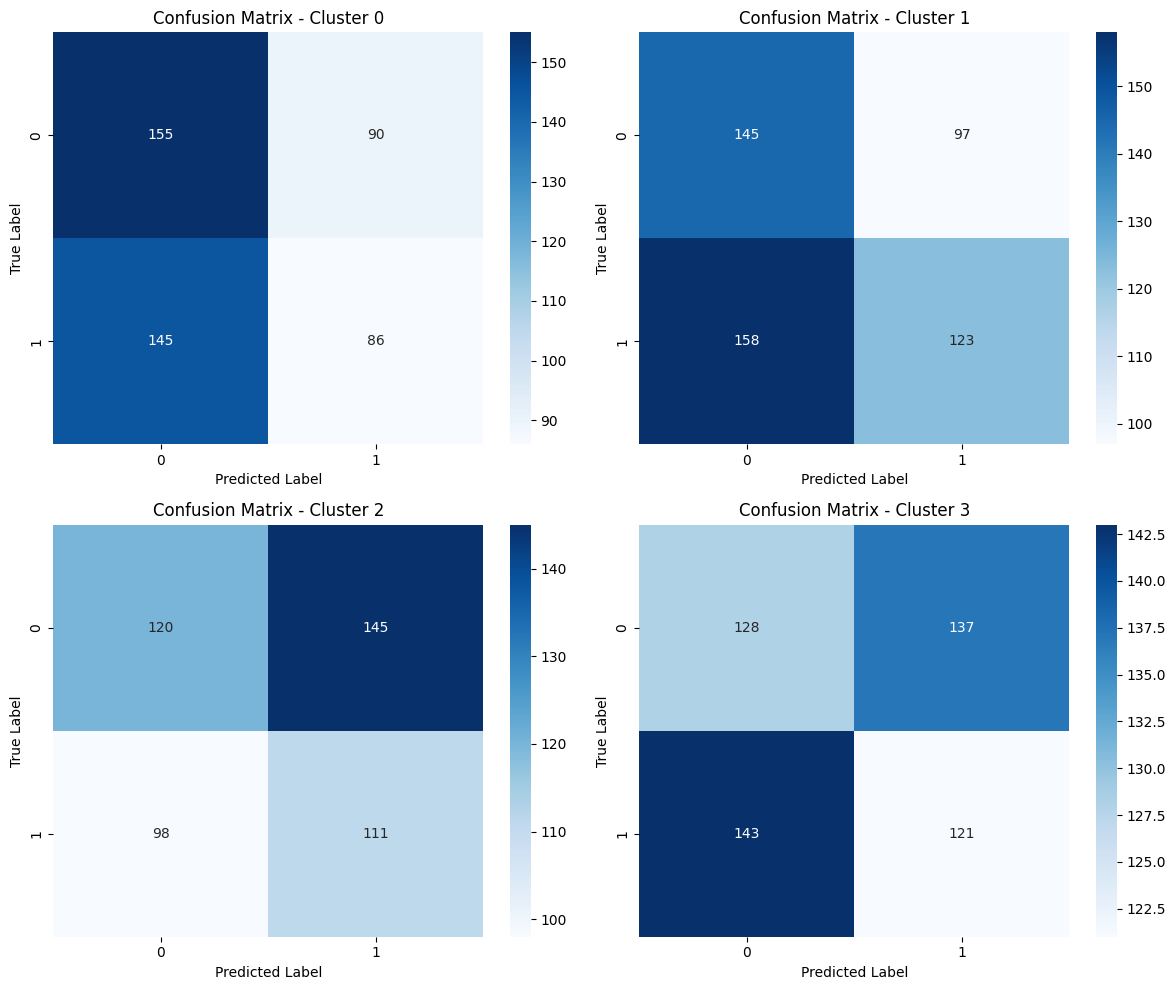

In [116]:
features = ['Age','Income', 'SpendingScore', 'OnlineShoppingFrequency']

n_clusters = len(df2['Cluster'].unique())
n_rows = (n_clusters + 1) // 2  # Ceil division for number of rows
fig, axes = plt.subplots(n_rows, 2, figsize=(12, 5*n_rows))
axes = axes.flatten()

for i, cluster in enumerate(sorted(df2['Cluster'].unique())):
    print(f"\n{'='*50}")
    print(f"Cluster {cluster} Analysis")
    print(f"{'='*50}")

    cluster_data = df2[df2['Cluster'] == cluster]
    print(f"Cluster size: {len(cluster_data)} samples")

    X = cluster_data[features]
    y = cluster_data['LoyaltyProgram']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)

    y_pred = log_reg.predict(X_test)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - Cluster {cluster}')
    axes[i].set_ylabel('True Label')
    axes[i].set_xlabel('Predicted Label')

# Remove unused axes if any
for idx in range(n_clusters, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()